In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import re
from collections import defaultdict, deque
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Helper function to read input from file if too large to paste inline
def read_input(fname):
    with open(fname, 'r') as f:
        data_str = f.read()
    return data_str

# Day 1: Chronal Calibration 
"We've detected some temporal anomalies," one of Santa's Elves at the Temporal Anomaly Research and Detection Instrument Station tells you. She sounded pretty worried when she called you down here. "At 500-year intervals into the past, someone has been changing Santa's history!"

"The good news is that the changes won't propagate to our time stream for another 25 days, and we have a device" - she attaches something to your wrist - "that will let you fix the changes with no such propagation delay. It's configured to send you 500 years further into the past every few days; that was the best we could do on such short notice."

"The bad news is that we are detecting roughly fifty anomalies throughout time; the device will indicate fixed anomalies with stars. The other bad news is that we only have one device and you're the best person for the job! Good lu--" She taps a button on the device and you suddenly feel like you're falling. To save Christmas, you need to get all fifty stars by December 25th.

Collect stars by solving puzzles. Two puzzles will be made available on each day in the advent calendar; the second puzzle is unlocked when you complete the first. Each puzzle grants one star. Good luck!

After feeling like you've been falling for a few minutes, you look at the device's tiny screen. "Error: Device must be calibrated before first use. Frequency drift detected. Cannot maintain destination lock." Below the message, the device shows a sequence of changes in frequency (your puzzle input). A value like +6 means the current frequency increases by 6; a value like -3 means the current frequency decreases by 3.

For example, if the device displays frequency changes of +1, -2, +3, +1, then starting from a frequency of zero, the following changes would occur:

    Current frequency  0, change of +1; resulting frequency  1.
    Current frequency  1, change of -2; resulting frequency -1.
    Current frequency -1, change of +3; resulting frequency  2.
    Current frequency  2, change of +1; resulting frequency  3.
    In this example, the resulting frequency is 3.

Here are other example situations:

    +1, +1, +1 results in  3
    +1, +1, -2 results in  0
    -1, -2, -3 results in -6

Starting with a frequency of zero, what is the resulting frequency after all of the changes in frequency have been applied?

Your puzzle answer was 402.

In [4]:
day1_input = read_input('day_01.txt')

In [5]:
day1_freq_changes = map(int, day1_input.split())

In [6]:
# Part 1 - total frequency change
sum(day1_freq_changes)

402

## Day 1 Part Two 
You notice that the device repeats the same frequency change list over and over. To calibrate the device, you need to find the first frequency it reaches twice.

For example, using the same list of changes above, the device would loop as follows:

    Current frequency  0, change of +1; resulting frequency  1.
    Current frequency  1, change of -2; resulting frequency -1.
    Current frequency -1, change of +3; resulting frequency  2.
    Current frequency  2, change of +1; resulting frequency  3.
    (At this point, the device continues from the start of the list.)
    Current frequency  3, change of +1; resulting frequency  4.
    Current frequency  4, change of -2; resulting frequency  2, which has already been seen.
In this example, the first frequency reached twice is 2. Note that your device might need to repeat its list of frequency changes many times before a duplicate frequency is found, and that duplicates might be found while in the middle of processing the list.

Here are other examples:

    +1, -1 first reaches 0 twice.
    +3, +3, +4, -2, -4 first reaches 10 twice.
    -6, +3, +8, +5, -6 first reaches 5 twice.
    +7, +7, -2, -7, -4 first reaches 14 twice.
What is the first frequency your device reaches twice?

Your puzzle answer was 481.

In [7]:
def first_freq_seen_twice(changes):
    # Keep looping through input and tracking what how many times we've seen current frequency
    i = 0
    loop_count = 0 
    N = len(changes)
    seen_twice = None
    current_freq = 0
    freq_seen = defaultdict(int)
    freq_seen[0] = 1
    while seen_twice is None:
        if i % N == 0:
            loop_count += 1
        this_change = changes[i % N]
        current_freq += this_change
        freq_seen[current_freq] += 1
        if freq_seen[current_freq] > 1:
            seen_twice = current_freq
        i += 1
    return seen_twice, loop_count

In [8]:
# first frequency seen twice and number of loop iterations required
first_freq_seen_twice(day1_freq_changes)

(481, 142)

Feels like there should be a smarter way to do this e.g. use cumsum input list somehow.
We see from the naive solution that it takes 142 loops to see a frequency again.

The plot below shows that the frequency changes are usually small with a few large jumps, and from part 1 we know that each loop has a net offset of +402. So we're interested in number of loops required before second or third regions in plot below start to ovelap either with first region or each other.

I don't have a solution for this yet, one to ponder.

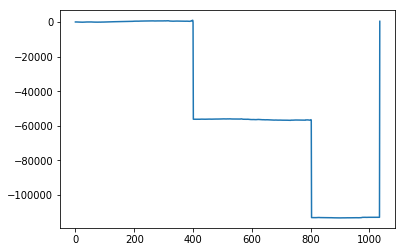

In [9]:
_ = plt.plot(np.cumsum(day1_freq_changes))
_ = plt.show()

# Day 2: Inventory Management System 
You stop falling through time, catch your breath, and check the screen on the device. "Destination reached. Current Year: 1518. Current Location: North Pole Utility Closet 83N10." You made it! Now, to find those anomalies.

Outside the utility closet, you hear footsteps and a voice. "...I'm not sure either. But now that so many people have chimneys, maybe he could sneak in that way?" Another voice responds, "Actually, we've been working on a new kind of suit that would let him fit through tight spaces like that. But, I heard that a few days ago, they lost the prototype fabric, the design plans, everything! Nobody on the team can even seem to remember important details of the project!"

"Wouldn't they have had enough fabric to fill several boxes in the warehouse? They'd be stored together, so the box IDs should be similar. Too bad it would take forever to search the warehouse for two similar box IDs..." They walk too far away to hear any more.

Late at night, you sneak to the warehouse - who knows what kinds of paradoxes you could cause if you were discovered - and use your fancy wrist device to quickly scan every box and produce a list of the likely candidates (your puzzle input).

To make sure you didn't miss any, you scan the likely candidate boxes again, counting the number that have an ID containing exactly two of any letter and then separately counting those with exactly three of any letter. You can multiply those two counts together to get a rudimentary checksum and compare it to what your device predicts.

For example, if you see the following box IDs:

    abcdef contains no letters that appear exactly two or three times.
    bababc contains two a and three b, so it counts for both.
    abbcde contains two b, but no letter appears exactly three times.
    abcccd contains three c, but no letter appears exactly two times.
    aabcdd contains two a and two d, but it only counts once.
    abcdee contains two e.
    ababab contains three a and three b, but it only counts once.
Of these box IDs, four of them contain a letter which appears exactly twice, and three of them contain a letter which appears exactly three times. Multiplying these together produces a checksum of 4 * 3 = 12.

What is the checksum for your list of box IDs?

Your puzzle answer was 6225.

In [10]:
box_ids = read_input('day_02.txt').split('\n')

In [11]:
len(box_ids)

250

In [12]:
def count_letters(box_id):
    res = defaultdict(int)
    for letter in box_id:
        res[letter] += 1
    count_2 = 1 if 2 in res.values() else 0
    count_3 = 1 if 3 in res.values() else 0
    return count_2, count_3

In [13]:
# checksum = 
np.prod(np.array([sum(lst) for lst in zip(*[count_letters(box_id) for box_id in box_ids])]))

6225

# Part Two
Confident that your list of box IDs is complete, you're ready to find the boxes full of prototype fabric.

The boxes will have IDs which differ by exactly one character at the same position in both strings. For example, given the following box IDs:

    abcde
    fghij
    klmno
    pqrst
    fguij
    axcye
    wvxyz
The IDs abcde and axcye are close, but they differ by two characters (the second and fourth). However, the IDs fghij and fguij differ by exactly one character, the third (h and u). Those must be the correct boxes.

What letters are common between the two correct box IDs? (In the example above, this is found by removing the differing character from either ID, producing fgij.)

Your puzzle answer was revtaubfniyhsgxdoajwkqilp.

In [14]:
box_ids_ints = np.array([[ord(c) for c in box_id] for box_id in box_ids])

In [15]:
def find_diff_1_boxes(box_ids):
    X = np.array([[ord(c) for c in box_id] for box_id in box_ids])
    res = []
    n_boxes = len(box_ids)
    for i in range(n_boxes):
        for j in range(i, n_boxes):
            char_diff = np.not_equal(X[i, :] - X[j, :], 0)
            n_char_diff = char_diff.sum()
            if n_char_diff == 1:
                res.append((i, j, int(np.nonzero(char_diff)[0])))
    return res

In [16]:
[(box_ids[i], box_ids[j], box_ids[i][:ind] + box_ids[i][ind+1:]) for (i, j, ind) in find_diff_1_boxes(box_ids)]

[('revtaubfniyhusgxdoajwkqilp',
  'revtaubfniyhpsgxdoajwkqilp',
  'revtaubfniyhsgxdoajwkqilp')]

# Day 3: No Matter How You Slice It 
The Elves managed to locate the chimney-squeeze prototype fabric for Santa's suit (thanks to someone who helpfully wrote its box IDs on the wall of the warehouse in the middle of the night). Unfortunately, anomalies are still affecting them - nobody can even agree on how to cut the fabric.

The whole piece of fabric they're working on is a very large square - at least 1000 inches on each side.

Each Elf has made a claim about which area of fabric would be ideal for Santa's suit. All claims have an ID and consist of a single rectangle with edges parallel to the edges of the fabric. Each claim's rectangle is defined as follows:

* The number of inches between the left edge of the fabric and the left edge of the rectangle.
* The number of inches between the top edge of the fabric and the top edge of the rectangle.
* The width of the rectangle in inches.
* The height of the rectangle in inches.

A claim like `#123 @ 3,2: 5x4` means that claim ID 123 specifies a rectangle 3 inches from the left edge, 2 inches from the top edge, 5 inches wide, and 4 inches tall. Visually, it claims the square inches of fabric represented by # (and ignores the square inches of fabric represented by .) in the diagram below:

    ...........
    ...........
    ...#####...
    ...#####...
    ...#####...
    ...#####...
    ...........
    ...........
    ...........
The problem is that many of the claims overlap, causing two or more claims to cover part of the same areas. For example, consider the following claims:

    #1 @ 1,3: 4x4
    #2 @ 3,1: 4x4
    #3 @ 5,5: 2x2
Visually, these claim the following areas:

    ........
    ...2222.
    ...2222.
    .11XX22.
    .11XX22.
    .111133.
    .111133.
    ........
The four square inches marked with X are claimed by both 1 and 2. (Claim 3, while adjacent to the others, does not overlap either of them.)

If the Elves all proceed with their own plans, none of them will have enough fabric. How many square inches of fabric are within two or more claims?

Your puzzle answer was 116920.

In [17]:
def parse_day_03():
    lines = [line.split() for line in read_input('day_03.txt').split('\n')]
    def parse_rec(rec):
        id = int(rec[0].lstrip('#'))
        x0, y0 = map(int, rec[2].rstrip(':').split(','))
        w, h = map(int, rec[3].split('x'))
        return {'id': id, 'x0': x0, 'y0': y0, 'w': w, 'h': h}
    recs = map(parse_rec, lines)
    return recs

In [18]:
claims = parse_day_03()

In [19]:
def find_overlap(claims):
    X = np.zeros((1000, 1000))
    claim_ok = []
    # Part 1: label all the squares claimed
    for claim in claims:
        X[claim['y0']:claim['y0']+claim['h'], claim['x0']:claim['x0']+claim['w']] += 1
    n_overlap = (X > 1).sum()
    
    # Part 2: check whether a claim is the only one for a given region
    for claim in claims:
        all_ok = (X[claim['y0']:claim['y0']+claim['h'], claim['x0']:claim['x0']+claim['w']] == 1).all()
        if all_ok:
            claim_ok.append(claim['id'])
            
    return n_overlap, claim_ok

In [20]:
find_overlap(claims)

(116920, [382])

# Part Two 
Amidst the chaos, you notice that exactly one claim doesn't overlap by even a single square inch of fabric with any other claim. If you can somehow draw attention to it, maybe the Elves will be able to make Santa's suit after all!

For example, in the claims above, only claim 3 is intact after all claims are made.

What is the ID of the only claim that doesn't overlap?

Your puzzle answer was 382.

# Day 4: Repose Record 
You've sneaked into another supply closet - this time, it's across from the prototype suit manufacturing lab. You need to sneak inside and fix the issues with the suit, but there's a guard stationed outside the lab, so this is as close as you can safely get.

As you search the closet for anything that might help, you discover that you're not the first person to want to sneak in. Covering the walls, someone has spent an hour starting every midnight for the past few months secretly observing this guard post! They've been writing down the ID of the one guard on duty that night - the Elves seem to have decided that one guard was enough for the overnight shift - as well as when they fall asleep or wake up while at their post (your puzzle input).

For example, consider the following records, which have already been organized into chronological order:

    [1518-11-01 00:00] Guard #10 begins shift
    [1518-11-01 00:05] falls asleep
    [1518-11-01 00:25] wakes up
    [1518-11-01 00:30] falls asleep
    [1518-11-01 00:55] wakes up
    [1518-11-01 23:58] Guard #99 begins shift
    [1518-11-02 00:40] falls asleep
    [1518-11-02 00:50] wakes up
    [1518-11-03 00:05] Guard #10 begins shift
    [1518-11-03 00:24] falls asleep
    [1518-11-03 00:29] wakes up
    [1518-11-04 00:02] Guard #99 begins shift
    [1518-11-04 00:36] falls asleep
    [1518-11-04 00:46] wakes up
    [1518-11-05 00:03] Guard #99 begins shift
    [1518-11-05 00:45] falls asleep
    [1518-11-05 00:55] wakes up
Timestamps are written using year-month-day hour:minute format. The guard falling asleep or waking up is always the one whose shift most recently started. Because all asleep/awake times are during the midnight hour (00:00 - 00:59), only the minute portion (00 - 59) is relevant for those events.

Visually, these records show that the guards are asleep at these times:

    Date   ID   Minute
                000000000011111111112222222222333333333344444444445555555555
                012345678901234567890123456789012345678901234567890123456789
    11-01  #10  .....####################.....#########################.....
    11-02  #99  ........................................##########..........
    11-03  #10  ........................#####...............................
    11-04  #99  ....................................##########..............
    11-05  #99  .............................................##########.....
The columns are Date, which shows the month-day portion of the relevant day; ID, which shows the guard on duty that day; and Minute, which shows the minutes during which the guard was asleep within the midnight hour. (The Minute column's header shows the minute's ten's digit in the first row and the one's digit in the second row.) Awake is shown as ., and asleep is shown as #.

Note that guards count as asleep on the minute they fall asleep, and they count as awake on the minute they wake up. For example, because Guard #10 wakes up at 00:25 on 1518-11-01, minute 25 is marked as awake.

If you can figure out the guard most likely to be asleep at a specific time, you might be able to trick that guard into working tonight so you can have the best chance of sneaking in. You have two strategies for choosing the best guard/minute combination.

__Strategy 1__: Find the guard that has the most minutes asleep. What minute does that guard spend asleep the most?

In the example above, Guard #10 spent the most minutes asleep, a total of 50 minutes (20+25+5), while Guard #99 only slept for a total of 30 minutes (10+10+10). Guard #10 was asleep most during minute 24 (on two days, whereas any other minute the guard was asleep was only seen on one day).

While this example listed the entries in chronological order, your entries are in the order you found them. You'll need to organize them before they can be analyzed.

What is the ID of the guard you chose multiplied by the minute you chose? (In the above example, the answer would be 10 * 24 = 240.)

Your puzzle answer was 146622.

In [21]:
events = sorted(read_input('day_04.txt').split('\n'))

In [22]:
def parse_sleep_events(events):
    res = []
    rec = None
    for event in events:
        if 'Guard' in event:
            # Start new record
            if rec is not None:
                res.append(rec)
            rec = {
                'guard_id': int(re.findall('#(\d+)', event)[0]),
                'sleep': [],
                'wake': []
            }
        if 'asleep' in event:
            rec['sleep'].append(int(re.findall(' 00:(\d{2})', event)[0]))
        if 'wakes' in event:
            rec['wake'].append(int(re.findall(' 00:(\d{2})', event)[0]))
    guard_sleeps = defaultdict(list)
    for rec in res:
        shift = np.zeros(60, dtype=np.int32)
        for sleep in rec['sleep']:
            shift[sleep] = 1
        for wake in rec['wake']:
            shift[wake] = -1
        shift = np.cumsum(shift)
        guard_sleeps[rec['guard_id']].append(shift)
    for guard_id in guard_sleeps.keys():
        guard_sleeps[guard_id] = np.array(guard_sleeps[guard_id])
    return guard_sleeps

In [23]:
guard_sleeps = parse_sleep_events(events)

In [24]:
def find_sleepiest(guard_sleeps):
    total_sleep = {k: v.sum() for k, v in guard_sleeps.iteritems()}
    sleepiest = None
    max_sleep = 0
    for guard, sleep in total_sleep.iteritems():
        if sleep > max_sleep:
            sleepiest = guard
            max_sleep = sleep
    most_often_asleep = np.argmax(np.sum(guard_sleeps[sleepiest], axis=0))
    return sleepiest, max_sleep, most_often_asleep, sleepiest*most_often_asleep

In [25]:
find_sleepiest(guard_sleeps)

(3491, 529, 42, 146622)

# Part Two 
Strategy 2: Of all guards, which guard is most frequently asleep on the same minute?

In the example above, Guard #99 spent minute 45 asleep more than any other guard or minute - three times in total. (In all other cases, any guard spent any minute asleep at most twice.)

What is the ID of the guard you chose multiplied by the minute you chose? (In the above example, the answer would be 99 * 45 = 4455.)

Your puzzle answer was 31848.

In [26]:
def find_most_often_asleep(guard_sleeps):
    often_asleep = {k: np.sum(v, axis=0) for k, v in guard_sleeps.iteritems()}
    most_sleeps = 0
    sleep_time = None
    sleep_guard = None
    for guard, sleep in often_asleep.iteritems():
        if np.max(sleep) > most_sleeps:
            most_sleeps = np.max(sleep)
            sleep_time = np.argmax(sleep)
            sleep_guard = guard
    return sleep_guard, most_sleeps, sleep_time, sleep_guard * sleep_time

In [27]:
find_most_often_asleep(guard_sleeps)

(1327, 17, 24, 31848)

# Day 5: Alchemical Reduction 
You've managed to sneak in to the prototype suit manufacturing lab. The Elves are making decent progress, but are still struggling with the suit's size reduction capabilities.

While the very latest in 1518 alchemical technology might have solved their problem eventually, you can do better. You scan the chemical composition of the suit's material and discover that it is formed by extremely long polymers (one of which is available as your puzzle input).

The polymer is formed by smaller units which, when triggered, react with each other such that two adjacent units of the same type and opposite polarity are destroyed. Units' types are represented by letters; units' polarity is represented by capitalization. For instance, r and R are units with the same type but opposite polarity, whereas r and s are entirely different types and do not react.

For example:

- In aA, a and A react, leaving nothing behind.
- In abBA, bB destroys itself, leaving aA. As above, this then destroys itself, leaving nothing.
- In abAB, no two adjacent units are of the same type, and so nothing happens.
- In aabAAB, even though aa and AA are of the same type, their polarities match, and so nothing happens.

Now, consider a larger example, dabAcCaCBAcCcaDA:

    dabAcCaCBAcCcaDA  The first 'cC' is removed.
    dabAaCBAcCcaDA    This creates 'Aa', which is removed.
    dabCBAcCcaDA      Either 'cC' or 'Cc' are removed (the result is the same).
    dabCBAcaDA        No further actions can be taken.
After all possible reactions, the resulting polymer contains 10 units.

How many units remain after fully reacting the polymer you scanned? 

Your puzzle answer was 11814.

In [28]:
polymer = read_input('day_05.txt')

In [29]:
def reduce_polymer(polymer, remove_unit=None):
    lower_letters = [chr(x) for x in range(ord('a'), ord('z') + 1)]
    upper_letters = [chr(x) for x in range(ord('A'), ord('Z') + 1)]
    lower_upper = [low + upp for low, upp in zip(lower_letters, upper_letters)]
    upper_lower = [upp + low for low, upp in zip(lower_letters, upper_letters)]
    if remove_unit is not None:
        polymer = polymer.replace(remove_unit.lower(), '').replace(remove_unit.upper(), '')
    n_poly = len(polymer)
    n_poly_new = n_poly
    done = False
    while not done:
        for lu in lower_upper:
            polymer = polymer.replace(lu, '')
        for ul in upper_lower:
            polymer = polymer.replace(ul, '')
        n_poly_new = len(polymer)
        done = n_poly_new == n_poly
        n_poly = n_poly_new
        
    return polymer

In [30]:
len(reduce_polymer(polymer))

11814

# Part Two 
Time to improve the polymer.

One of the unit types is causing problems; it's preventing the polymer from collapsing as much as it should. Your goal is to figure out which unit type is causing the most problems, remove all instances of it (regardless of polarity), fully react the remaining polymer, and measure its length.

For example, again using the polymer dabAcCaCBAcCcaDA from above:

- Removing all A/a units produces dbcCCBcCcD. Fully reacting this polymer produces dbCBcD, which has length 6.
- Removing all B/b units produces daAcCaCAcCcaDA. Fully reacting this polymer produces daCAcaDA, which has length 8.
- Removing all C/c units produces dabAaBAaDA. Fully reacting this polymer produces daDA, which has length 4.
- Removing all D/d units produces abAcCaCBAcCcaA. Fully reacting this polymer produces abCBAc, which has length 6.
In this example, removing all C/c units was best, producing the answer 4.

What is the length of the shortest polymer you can produce by removing all units of exactly one type and fully reacting the result?

Your puzzle answer was 4282.

In [31]:
min([len(reduce_polymer(polymer, chr(x))) for x in range(ord('a'), ord('z')+1)])

4282

# Day 6: Chronal Coordinates 
The device on your wrist beeps several times, and once again you feel like you're falling.

"Situation critical," the device announces. "Destination indeterminate. Chronal interference detected. Please specify new target coordinates."

The device then produces a list of coordinates (your puzzle input). Are they places it thinks are safe or dangerous? It recommends you check manual page 729. The Elves did not give you a manual.

If they're dangerous, maybe you can minimize the danger by finding the coordinate that gives the largest distance from the other points.

Using only the Manhattan distance, determine the area around each coordinate by counting the number of integer X,Y locations that are closest to that coordinate (and aren't tied in distance to any other coordinate).

Your goal is to find the size of the largest area that isn't infinite. For example, consider the following list of coordinates:

    1, 1
    1, 6
    8, 3
    3, 4
    5, 5
    8, 9
If we name these coordinates A through F, we can draw them on a grid, putting 0,0 at the top left:

    ..........
    .A........
    ..........
    ........C.
    ...D......
    .....E....
    .B........
    ..........
    ..........
    ........F.
This view is partial - the actual grid extends infinitely in all directions. Using the Manhattan distance, each location's closest coordinate can be determined, shown here in lowercase:

    aaaaa.cccc
    aAaaa.cccc
    aaaddecccc
    aadddeccCc
    ..dDdeeccc
    bb.deEeecc
    bBb.eeee..
    bbb.eeefff
    bbb.eeffff
    bbb.ffffFf
Locations shown as . are equally far from two or more coordinates, and so they don't count as being closest to any.

In this example, the areas of coordinates A, B, C, and F are infinite - while not shown here, their areas extend forever outside the visible grid. However, the areas of coordinates D and E are finite: D is closest to 9 locations, and E is closest to 17 (both including the coordinate's location itself). Therefore, in this example, the size of the largest area is 17.

What is the size of the largest area that isn't infinite?

Your puzzle answer was 4342.

In [32]:
coords = np.array([[int(x), int(y)] for x, y in  [c.split(',') for c in read_input('day_06.txt').split('\n') ]])

In [33]:
 coords[:10]

array([[156, 193],
       [ 81, 315],
       [ 50, 197],
       [ 84, 234],
       [124, 162],
       [339, 345],
       [259, 146],
       [240, 350],
       [ 97, 310],
       [202, 119]])

In [34]:
def label_closest(coords):
    x_max, y_max = coords.max(axis=0) + 1
    region = np.nan*np.zeros((x_max, y_max))
    for x in range(x_max):
        for y in range(y_max):
            dist = np.sum(np.abs(coords - np.array([x, y])), axis=1)
            if len(dist[dist == dist.min()]) == 1:
                region[x, y] = np.argmin(dist)
    return region

In [35]:
closest = label_closest(coords)

In [36]:
def find_largest_finite_area(closest):
    # Ignore points that go to infinity ie ones on boundary
    on_boundary = [int(x) for x in list(
        set(closest[0, :].tolist()) | set(closest[-1, :].tolist()) 
        | set(closest[:, 0].tolist()) | set(closest[:, -1].tolist())) if not np.isnan(x)]
    all_indexes = [int(x) for x in np.unique(closest) if not np.isnan(x)]
    finite_region_indexes = list(set(all_indexes) - set(on_boundary))
    max_area = 0
    max_area_index = None
    for ind in finite_region_indexes:
        area = np.sum(closest == ind)
        if area > max_area:
            max_area = area
            max_area_index = ind
    return max_area_index, max_area

In [37]:
find_largest_finite_area(closest)

(16, 4342)

# Part Two 
On the other hand, if the coordinates are safe, maybe the best you can do is try to find a region near as many coordinates as possible.

For example, suppose you want the sum of the Manhattan distance to all of the coordinates to be less than 32. For each location, add up the distances to all of the given coordinates; if the total of those distances is less than 32, that location is within the desired region. Using the same coordinates as above, the resulting region looks like this:

    ..........
    .A........
    ..........
    ...###..C.
    ..#D###...
    ..###E#...
    .B.###....
    ..........
    ..........
    ........F.
In particular, consider the highlighted location 4,3 located at the top middle of the region. Its calculation is as follows, where abs() is the absolute value function:

- Distance to coordinate A: `abs(4-1) + abs(3-1) =  5`
- Distance to coordinate B: `abs(4-1) + abs(3-6) =  6`
- Distance to coordinate C: `abs(4-8) + abs(3-3) =  4`
- Distance to coordinate D: `abs(4-3) + abs(3-4) =  2`
- Distance to coordinate E: `abs(4-5) + abs(3-5) =  3`
- Distance to coordinate F: `abs(4-8) + abs(3-9) = 10`
- Total distance: `5 + 6 + 4 + 2 + 3 + 10 = 30`

Because the total distance to all coordinates (30) is less than 32, the location is __within__ the region.

This region, which also includes coordinates D and E, has a total size of __16__.

Your actual region will need to be much larger than this example, though, instead including all locations with a total distance of less than 10000.

What is the size of the region containing all locations which have a total distance to all given coordinates of less than 10000?

Your puzzle answer was 42966.

In [38]:
def label_total_dist(coords):
    x_max, y_max = coords.max(axis=0) + 1
    region = np.nan*np.zeros((x_max, y_max))
    for x in range(x_max):
        for y in range(y_max):
            region[x, y] = np.sum(np.abs(coords - np.array([x, y])))
    return region

In [39]:
total_dist = label_total_dist(coords)

In [40]:
np.sum(total_dist < 10000)

42966

# Day 7: The Sum of Its Parts 
You find yourself standing on a snow-covered coastline; apparently, you landed a little off course. The region is too hilly to see the North Pole from here, but you do spot some Elves that seem to be trying to unpack something that washed ashore. It's quite cold out, so you decide to risk creating a paradox by asking them for directions.

"Oh, are you the search party?" Somehow, you can understand whatever Elves from the year 1018 speak; you assume it's Ancient Nordic Elvish. Could the device on your wrist also be a translator? "Those clothes don't look very warm; take this." They hand you a heavy coat.

"We do need to find our way back to the North Pole, but we have higher priorities at the moment. You see, believe it or not, this box contains something that will solve all of Santa's transportation problems - at least, that's what it looks like from the pictures in the instructions." It doesn't seem like they can read whatever language it's in, but you can: "Sleigh kit. Some assembly required."

"'Sleigh'? What a wonderful name! You must help us assemble this 'sleigh' at once!" They start excitedly pulling more parts out of the box.

The instructions specify a series of steps and requirements about which steps must be finished before others can begin (your puzzle input). Each step is designated by a single letter. For example, suppose you have the following instructions:

    Step C must be finished before step A can begin.
    Step C must be finished before step F can begin.
    Step A must be finished before step B can begin.
    Step A must be finished before step D can begin.
    Step B must be finished before step E can begin.
    Step D must be finished before step E can begin.
    Step F must be finished before step E can begin.

Visually, these requirements look like this:


      -->A--->B--
     /    \      \
    C      -->D----->E
     \           /
      ---->F-----
Your first goal is to determine the order in which the steps should be completed. If more than one step is ready, choose the step which is first alphabetically. In this example, the steps would be completed as follows:

- Only C is available, and so it is done first.
- Next, both A and F are available. A is first alphabetically, so it is done next.
- Then, even though F was available earlier, steps B and D are now also available, and B is the first alphabetically of the three.
- After that, only D and F are available. E is not available because only some of its prerequisites are complete. Therefore, D is completed next.
- F is the only choice, so it is done next.
- Finally, E is completed.

So, in this example, the correct order is CABDFE.

In what order should the steps in your instructions be completed?

Your puzzle answer was `SCLPAMQVUWNHODRTGYKBJEFXZI`.

In [41]:
step_dep = [[c[5], c[-12]] for c in read_input('day_07.txt').split('\n')]

In [42]:
def parse_dep(step_dep):
    pre_cond, step = zip(*step_dep)
    all_steps = list(set(pre_cond) | set(step))
    deps = defaultdict(list)
    for d in step_dep:
        deps[d[1]].append(d[0])
    for d in list(set(all_steps) - set(deps.keys())):
        deps[d] = []
    return deps

In [43]:
deps = parse_dep(step_dep)

In [44]:
def complete_steps(deps, n_helpers=0, step_base_time=60, display=False):
    steps_taken = ''
    steps_left = deps.keys()
    workers = {n: [] for n in range(n_helpers+1)}
    steps_in_progress = ''
    time_taken = 0
    while steps_left != []:
        # List of all steps with no dependencies
        next_steps = sorted([k for k, v in deps.iteritems() if v == [] and k not in steps_taken])
        
        # Allocate all available workers to the next available steps
        for step in next_steps:
            for w, v in workers.iteritems():
                if step in steps_in_progress:
                    break
                if v == []:
                    workers[w] = (step, step_base_time + ord(step) - ord('A') + 1)
                    steps_in_progress += step
        
        if display:
            # Show what workers are doing and time remaining
            print(workers)
        
        # Increment time to next task completion
        time_to_next_completed_step = min([v[1] for v in workers.values() if v != []])
        time_taken += time_to_next_completed_step
        
        # Update time remaining
        for w, v in workers.iteritems():
            if v != []:
                workers[w] = (workers[w][0], workers[w][1] - time_to_next_completed_step)
        
        # Record completed steps
        for w, v in workers.iteritems():
            if v != [] and v[1] == 0:
                steps_taken += v[0]
                steps_in_progress = ''.join(list(set(steps_in_progress) - set(v[0])))
                workers[w] = []
        
        # Update dependencies to remove completed steps
        deps = {k: list(set(v) - set(steps_taken)) for k, v in deps.iteritems()}
        
        # Update list of steps still to do
        steps_left = list(set(steps_left) - set(steps_taken))
    return steps_taken, time_taken

In [45]:
complete_steps(parse_dep(step_dep), n_helpers=4, display=True)

{0: ('S', 79), 1: [], 2: [], 3: [], 4: []}
{0: ('C', 63), 1: [], 2: [], 3: [], 4: []}
{0: ('L', 72), 1: ('P', 76), 2: [], 3: [], 4: []}
{0: ('V', 82), 1: ('P', 4), 2: ('W', 83), 3: [], 4: []}
{0: ('V', 78), 1: ('A', 61), 2: ('W', 79), 3: ('M', 73), 4: ('Q', 77)}
{0: ('V', 17), 1: ('Y', 85), 2: ('W', 18), 3: ('M', 12), 4: ('Q', 16)}
{0: ('V', 5), 1: ('Y', 73), 2: ('W', 6), 3: [], 4: ('Q', 4)}
{0: ('V', 1), 1: ('Y', 69), 2: ('W', 2), 3: [], 4: []}
{0: ('U', 81), 1: ('Y', 68), 2: ('W', 1), 3: [], 4: []}
{0: ('U', 80), 1: ('Y', 67), 2: ('N', 74), 3: [], 4: []}
{0: ('U', 13), 1: [], 2: ('N', 7), 3: [], 4: []}
{0: ('U', 6), 1: ('H', 68), 2: [], 3: [], 4: []}
{0: [], 1: ('H', 62), 2: [], 3: [], 4: []}
{0: ('O', 75), 1: [], 2: [], 3: [], 4: []}
{0: ('D', 64), 1: ('T', 80), 2: [], 3: [], 4: []}
{0: ('R', 78), 1: ('T', 16), 2: [], 3: [], 4: []}
{0: ('R', 62), 1: ('G', 67), 2: [], 3: [], 4: []}
{0: [], 1: ('G', 5), 2: [], 3: [], 4: []}
{0: ('K', 71), 1: [], 2: [], 3: [], 4: []}
{0: ('B', 62), 1: 

('SCLPAMQVWYNUHODTRGKBJEFXZI', 1234)

# Part Two 
As you're about to begin construction, four of the Elves offer to help. "The sun will set soon; it'll go faster if we work together." Now, you need to account for multiple people working on steps simultaneously. If multiple steps are available, workers should still begin them in alphabetical order.

Each step takes 60 seconds plus an amount corresponding to its letter: A=1, B=2, C=3, and so on. So, step A takes 60+1=61 seconds, while step Z takes 60+26=86 seconds. No time is required between steps.

To simplify things for the example, however, suppose you only have help from one Elf (a total of two workers) and that each step takes 60 fewer seconds (so that step A takes 1 second and step Z takes 26 seconds). Then, using the same instructions as above, this is how each second would be spent:

    Second   Worker 1   Worker 2   Done
       0        C          .        
       1        C          .        
       2        C          .        
       3        A          F       C
       4        B          F       CA
       5        B          F       CA
       6        D          F       CAB
       7        D          F       CAB
       8        D          F       CAB
       9        D          .       CABF
      10        E          .       CABFD
      11        E          .       CABFD
      12        E          .       CABFD
      13        E          .       CABFD
      14        E          .       CABFD
      15        .          .       CABFDE
      
Each row represents one second of time. The Second column identifies how many seconds have passed as of the beginning of that second. Each worker column shows the step that worker is currently doing (or . if they are idle). The Done column shows completed steps.

Note that the order of the steps has changed; this is because steps now take time to finish and multiple workers can begin multiple steps simultaneously.

In this example, it would take 15 seconds for two workers to complete these steps.

With 5 workers and the 60+ second step durations described above, how long will it take to complete all of the steps?

Your puzzle answer was `1234`.

# Day 8: Memory Maneuver 
The sleigh is much easier to pull than you'd expect for something its weight. Unfortunately, neither you nor the Elves know which way the North Pole is from here.

You check your wrist device for anything that might help. It seems to have some kind of navigation system! Activating the navigation system produces more bad news: "Failed to start navigation system. Could not read software license file."

The navigation system's license file consists of a list of numbers (your puzzle input). The numbers define a data structure which, when processed, produces some kind of tree that can be used to calculate the license number.

The tree is made up of nodes; a single, outermost node forms the tree's root, and it contains all other nodes in the tree (or contains nodes that contain nodes, and so on).

Specifically, a node consists of:

- A header, which is always exactly two numbers:
- - The quantity of child nodes.
- - The quantity of metadata entries.
- Zero or more child nodes (as specified in the header).
- One or more metadata entries (as specified in the header).

Each child node is itself a node that has its own header, child nodes, and metadata. For example:

    2 3 0 3 10 11 12 1 1 0 1 99 2 1 1 2
    A----------------------------------
        B----------- C-----------
                         D-----
In this example, each node of the tree is also marked with an underline starting with a letter for easier identification. In it, there are four nodes:

- A, which has 2 child nodes (B, C) and 3 metadata entries (1, 1, 2).
- B, which has 0 child nodes and 3 metadata entries (10, 11, 12).
- C, which has 1 child node (D) and 1 metadata entry (2).
- D, which has 0 child nodes and 1 metadata entry (99).
The first check done on the license file is to simply add up all of the metadata entries. In this example, that sum is 1+1+2+10+11+12+2+99=138.

What is the sum of all metadata entries?

Your puzzle answer was 36307.

In [46]:
license = map(int, read_input('day_08.txt').split())

In [47]:
license[:10]

[7, 11, 6, 3, 5, 5, 3, 6, 1, 7]

In [48]:
def parse_license(license):
    nodes = {}
    node = 0
    n_node = 0
    meta_sum = 0
    n_meta = 0
    parent = None
    mode = 'read_n_child'
    for x in license:
        if mode == 'read_n_child':
            if node not in nodes.keys():
                nodes[node] = {
                    'n_child': x, 'n_meta': 0, 'meta': [], 
                    'parent': parent, 'children': [],
                    'value': 0 # Part 2
                }
                mode = 'read_n_meta'
            else:
                mode = 'read_meta'
            continue
        if mode == 'read_n_meta':
            nodes[node]['n_meta'] = x
            if nodes[node]['n_child'] == 0:
                mode = 'read_meta'
                n_meta = x
            else:
                # Create new node
                parent = n_node
                n_node += 1
                node = n_node
                mode = 'read_n_child'
            continue
        if mode == 'read_meta':
            nodes[node]['meta'].append(x)
            meta_sum += x
            n_meta -= 1
            if n_meta == 0:
                # Part 2
                if nodes[node]['n_child'] == 0:
                    nodes[node]['value'] = sum(nodes[node]['meta'])
                else:
                    for m in nodes[node]['meta']:
                        # print(node, m, nodes[node]['children'])
                        if m <= len(nodes[node]['children']):
                            child_value = nodes[ nodes[node]['children'][m-1] ]['value']
                            # print(node, child_value)
                            nodes[node]['value'] += child_value
                
                if nodes[node]['parent'] is not None:
                    nodes[nodes[node]['parent']]['children'].append(node)
                    if len(nodes[nodes[node]['parent']]['children']) == nodes[nodes[node]['parent']]['n_child']:
                        # Read parent metadata
                        n_meta = nodes[nodes[node]['parent']]['n_meta']
                        node = nodes[node]['parent']
                        mode = 'read_meta'
                    else:
                        # Create new node
                        parent = nodes[node]['parent']
                        n_node = n_node + 1
                        node = n_node
                        mode = 'read_n_child'
            continue
    return nodes, meta_sum

In [49]:
parse_license(map(int, '2 3 0 3 10 11 12 1 1 0 1 99 2 1 1 2'.split()))
# parse_license(map(int, '2 3 0 3 10 11 12 1 1 0 1 99 1 1 1 2'.split()))

({0: {'children': [1, 2],
   'meta': [1, 1, 2],
   'n_child': 2,
   'n_meta': 3,
   'parent': None,
   'value': 66},
  1: {'children': [],
   'meta': [10, 11, 12],
   'n_child': 0,
   'n_meta': 3,
   'parent': 0,
   'value': 33},
  2: {'children': [3],
   'meta': [2],
   'n_child': 1,
   'n_meta': 1,
   'parent': 0,
   'value': 0},
  3: {'children': [],
   'meta': [99],
   'n_child': 0,
   'n_meta': 1,
   'parent': 2,
   'value': 99}},
 138)

In [50]:
license_nodes, license_meta_sum = parse_license(license)

In [51]:
license_meta_sum

36307

# Part Two 
The second check is slightly more complicated: you need to find the value of the root node (A in the example above).

The value of a node depends on whether it has child nodes.

If a node has no child nodes, its value is the sum of its metadata entries. So, the value of node B is 10+11+12=33, and the value of node D is 99.

However, if a node does have child nodes, the metadata entries become indexes which refer to those child nodes. A metadata entry of 1 refers to the first child node, 2 to the second, 3 to the third, and so on. The value of this node is the sum of the values of the child nodes referenced by the metadata entries. If a referenced child node does not exist, that reference is skipped. A child node can be referenced multiple time and counts each time it is referenced. A metadata entry of 0 does not refer to any child node.

For example, again using the above nodes:

- Node C has one metadata entry, 2. Because node C has only one child node, 2 references a child node which does not exist, and so the value of node C is 0.
- Node A has three metadata entries: 1, 1, and 2. The 1 references node A's first child node, B, and the 2 references node A's second child node, C. Because node B has a value of 33 and node C has a value of 0, the value of node A is 33+33+0=66.

So, in this example, the value of the root node is 66.

What is the value of the root node?

Your puzzle answer was 25154.

In [52]:
license_nodes[0]['value']

25154

# Day 9: Marble Mania 
You talk to the Elves while you wait for your navigation system to initialize. To pass the time, they introduce you to their favorite marble game.

The Elves play this game by taking turns arranging the marbles in a circle according to very particular rules. The marbles are numbered starting with 0 and increasing by 1 until every marble has a number.

First, the marble numbered 0 is placed in the circle. At this point, while it contains only a single marble, it is still a circle: the marble is both clockwise from itself and counter-clockwise from itself. This marble is designated the current marble.

Then, each Elf takes a turn placing the lowest-numbered remaining marble into the circle between the marbles that are 1 and 2 marbles clockwise of the current marble. (When the circle is large enough, this means that there is one marble between the marble that was just placed and the current marble.) The marble that was just placed then becomes the current marble.

However, if the marble that is about to be placed has a number which is a multiple of 23, something entirely different happens. First, the current player keeps the marble they would have placed, adding it to their score. In addition, the marble 7 marbles counter-clockwise from the current marble is removed from the circle and also added to the current player's score. The marble located immediately clockwise of the marble that was removed becomes the new current marble.

For example, suppose there are 9 players. After the marble with value 0 is placed in the middle, each player (shown in square brackets) takes a turn. The result of each of those turns would produce circles of marbles like this, where clockwise is to the right and the resulting current marble is in parentheses:

    [-] (0)
    [1]  0 (1)
    [2]  0 (2) 1 
    [3]  0  2  1 (3)
    [4]  0 (4) 2  1  3 
    [5]  0  4  2 (5) 1  3 
    [6]  0  4  2  5  1 (6) 3 
    [7]  0  4  2  5  1  6  3 (7)
    [8]  0 (8) 4  2  5  1  6  3  7 
    [9]  0  8  4 (9) 2  5  1  6  3  7 
    [1]  0  8  4  9  2(10) 5  1  6  3  7 
    [2]  0  8  4  9  2 10  5(11) 1  6  3  7 
    [3]  0  8  4  9  2 10  5 11  1(12) 6  3  7 
    [4]  0  8  4  9  2 10  5 11  1 12  6(13) 3  7 
    [5]  0  8  4  9  2 10  5 11  1 12  6 13  3(14) 7 
    [6]  0  8  4  9  2 10  5 11  1 12  6 13  3 14  7(15)
    [7]  0(16) 8  4  9  2 10  5 11  1 12  6 13  3 14  7 15 
    [8]  0 16  8(17) 4  9  2 10  5 11  1 12  6 13  3 14  7 15 
    [9]  0 16  8 17  4(18) 9  2 10  5 11  1 12  6 13  3 14  7 15 
    [1]  0 16  8 17  4 18  9(19) 2 10  5 11  1 12  6 13  3 14  7 15 
    [2]  0 16  8 17  4 18  9 19  2(20)10  5 11  1 12  6 13  3 14  7 15 
    [3]  0 16  8 17  4 18  9 19  2 20 10(21) 5 11  1 12  6 13  3 14  7 15 
    [4]  0 16  8 17  4 18  9 19  2 20 10 21  5(22)11  1 12  6 13  3 14  7 15 
    [5]  0 16  8 17  4 18(19) 2 20 10 21  5 22 11  1 12  6 13  3 14  7 15 
    [6]  0 16  8 17  4 18 19  2(24)20 10 21  5 22 11  1 12  6 13  3 14  7 15 
    [7]  0 16  8 17  4 18 19  2 24 20(25)10 21  5 22 11  1 12  6 13  3 14  7 15
The goal is to be the player with the highest score after the last marble is used up. Assuming the example above ends after the marble numbered 25, the winning score is 23+9=32 (because player 5 kept marble 23 and removed marble 9, while no other player got any points in this very short example game).

Here are a few more examples:

- 10 players; last marble is worth 1618 points: high score is 8317
- 13 players; last marble is worth 7999 points: high score is 146373
- 17 players; last marble is worth 1104 points: high score is 2764
- 21 players; last marble is worth 6111 points: high score is 54718
- 30 players; last marble is worth 5807 points: high score is 37305

What is the winning Elf's score?

Your puzzle answer was 390093.

In [53]:
n_players, n_marbles = [int(el) for i, el in enumerate(read_input('day_09.txt').split()) if i in [0, 6]]

In [54]:
def play_marbles(n_players, n_marbles, display=False):
    players = defaultdict(int)
    current_player = 1
    current_pos = 0
    marbles = deque()
    marbles.append(0)
    for m in range(1, n_marbles + 1):
        if display:
            print(marbles)
        if m % 23 != 0:
#             next_pos = (current_pos + 1) % len(marbles)
#             marbles = marbles[:next_pos + 1] + [m] + marbles[next_pos + 1:]
#             current_pos = next_pos + 1
            
            marbles.rotate(-1)
            marbles.append(m)
        else:
#             players[current_player] += m
#             pos_to_remove = (current_pos - 7) % len(marbles)
#             players[current_player] += marbles[pos_to_remove]
#             marbles = marbles[:pos_to_remove] + marbles[pos_to_remove + 1:]
#             current_pos = pos_to_remove

            marbles.rotate(7)
            players[current_player] += m + marbles.pop()
            marbles.rotate(-1)
            
        current_player = (current_player + 1) % n_players
    return max(players.values())

In [55]:
play_marbles(9, 25, display=True)

deque([0])
deque([0, 1])
deque([1, 0, 2])
deque([0, 2, 1, 3])
deque([2, 1, 3, 0, 4])
deque([1, 3, 0, 4, 2, 5])
deque([3, 0, 4, 2, 5, 1, 6])
deque([0, 4, 2, 5, 1, 6, 3, 7])
deque([4, 2, 5, 1, 6, 3, 7, 0, 8])
deque([2, 5, 1, 6, 3, 7, 0, 8, 4, 9])
deque([5, 1, 6, 3, 7, 0, 8, 4, 9, 2, 10])
deque([1, 6, 3, 7, 0, 8, 4, 9, 2, 10, 5, 11])
deque([6, 3, 7, 0, 8, 4, 9, 2, 10, 5, 11, 1, 12])
deque([3, 7, 0, 8, 4, 9, 2, 10, 5, 11, 1, 12, 6, 13])
deque([7, 0, 8, 4, 9, 2, 10, 5, 11, 1, 12, 6, 13, 3, 14])
deque([0, 8, 4, 9, 2, 10, 5, 11, 1, 12, 6, 13, 3, 14, 7, 15])
deque([8, 4, 9, 2, 10, 5, 11, 1, 12, 6, 13, 3, 14, 7, 15, 0, 16])
deque([4, 9, 2, 10, 5, 11, 1, 12, 6, 13, 3, 14, 7, 15, 0, 16, 8, 17])
deque([9, 2, 10, 5, 11, 1, 12, 6, 13, 3, 14, 7, 15, 0, 16, 8, 17, 4, 18])
deque([2, 10, 5, 11, 1, 12, 6, 13, 3, 14, 7, 15, 0, 16, 8, 17, 4, 18, 9, 19])
deque([10, 5, 11, 1, 12, 6, 13, 3, 14, 7, 15, 0, 16, 8, 17, 4, 18, 9, 19, 2, 20])
deque([5, 11, 1, 12, 6, 13, 3, 14, 7, 15, 0, 16, 8, 17, 4, 18, 9, 19, 2, 

32

In [56]:
play_marbles(10, 1618)

8317

In [57]:
play_marbles(n_players, n_marbles)

390093

# Part Two 
Amused by the speed of your answer, the Elves are curious:

What would the new winning Elf's score be if the number of the last marble were 100 times larger?

Your puzzle answer was 3150377341.

## Confession:
My original solution using Python lists was obviously going to be far to slow for this (took about 20s for Part 1).  After thinking for a bit I caved in and checked the Reddit solutions and found out about deque solution which is equivalent but uses a better data structure.  So today I learned something :)

In [58]:
play_marbles(n_players, n_marbles * 100)

3150377341

# Day 10: The Stars Align 
It's no use; your navigation system simply isn't capable of providing walking directions in the arctic circle, and certainly not in 1018.

The Elves suggest an alternative. In times like these, North Pole rescue operations will arrange points of light in the sky to guide missing Elves back to base. Unfortunately, the message is easy to miss: the points move slowly enough that it takes hours to align them, but have so much momentum that they only stay aligned for a second. If you blink at the wrong time, it might be hours before another message appears.

You can see these points of light floating in the distance, and record their position in the sky and their velocity, the relative change in position per second (your puzzle input). The coordinates are all given from your perspective; given enough time, those positions and velocities will move the points into a cohesive message!

Rather than wait, you decide to fast-forward the process and calculate what the points will eventually spell.

For example, suppose you note the following points:

    position=< 9,  1> velocity=< 0,  2>
    position=< 7,  0> velocity=<-1,  0>
    position=< 3, -2> velocity=<-1,  1>
    position=< 6, 10> velocity=<-2, -1>
    position=< 2, -4> velocity=< 2,  2>
    position=<-6, 10> velocity=< 2, -2>
    position=< 1,  8> velocity=< 1, -1>
    position=< 1,  7> velocity=< 1,  0>
    position=<-3, 11> velocity=< 1, -2>
    position=< 7,  6> velocity=<-1, -1>
    position=<-2,  3> velocity=< 1,  0>
    position=<-4,  3> velocity=< 2,  0>
    position=<10, -3> velocity=<-1,  1>
    position=< 5, 11> velocity=< 1, -2>
    position=< 4,  7> velocity=< 0, -1>
    position=< 8, -2> velocity=< 0,  1>
    position=<15,  0> velocity=<-2,  0>
    position=< 1,  6> velocity=< 1,  0>
    position=< 8,  9> velocity=< 0, -1>
    position=< 3,  3> velocity=<-1,  1>
    position=< 0,  5> velocity=< 0, -1>
    position=<-2,  2> velocity=< 2,  0>
    position=< 5, -2> velocity=< 1,  2>
    position=< 1,  4> velocity=< 2,  1>
    position=<-2,  7> velocity=< 2, -2>
    position=< 3,  6> velocity=<-1, -1>
    position=< 5,  0> velocity=< 1,  0>
    position=<-6,  0> velocity=< 2,  0>
    position=< 5,  9> velocity=< 1, -2>
    position=<14,  7> velocity=<-2,  0>
    position=<-3,  6> velocity=< 2, -1>

Each line represents one point. Positions are given as <X, Y> pairs: X represents how far left (negative) or right (positive) the point appears, while Y represents how far up (negative) or down (positive) the point appears.

At 0 seconds, each point has the position given. Each second, each point's velocity is added to its position. So, a point with velocity <1, -2> is moving to the right, but is moving upward twice as quickly. If this point's initial position were <3, 9>, after 3 seconds, its position would become <6, 3>.

Over time, the points listed above would move like this:

Initially:

    ........#.............
    ................#.....
    .........#.#..#.......
    ......................
    #..........#.#.......#
    ...............#......
    ....#.................
    ..#.#....#............
    .......#..............
    ......#...............
    ...#...#.#...#........
    ....#..#..#.........#.
    .......#..............
    ...........#..#.......
    #...........#.........
    ...#.......#..........

After 1 second:

    ......................
    ......................
    ..........#....#......
    ........#.....#.......
    ..#.........#......#..
    ......................
    ......#...............
    ....##.........#......
    ......#.#.............
    .....##.##..#.........
    ........#.#...........
    ........#...#.....#...
    ..#...........#.......
    ....#.....#.#.........
    ......................
    ......................

After 2 seconds:

    ......................
    ......................
    ......................
    ..............#.......
    ....#..#...####..#....
    ......................
    ........#....#........
    ......#.#.............
    .......#...#..........
    .......#..#..#.#......
    ....#....#.#..........
    .....#...#...##.#.....
    ........#.............
    ......................
    ......................
    ......................

After 3 seconds:

    ......................
    ......................
    ......................
    ......................
    ......#...#..###......
    ......#...#...#.......
    ......#...#...#.......
    ......#####...#.......
    ......#...#...#.......
    ......#...#...#.......
    ......#...#...#.......
    ......#...#..###......
    ......................
    ......................
    ......................
    ......................

After 4 seconds:

    ......................
    ......................
    ......................
    ............#.........
    ........##...#.#......
    ......#.....#..#......
    .....#..##.##.#.......
    .......##.#....#......
    ...........#....#.....
    ..............#.......
    ....#......#...#......
    .....#.....##.........
    ...............#......
    ...............#......
    ......................
    ......................
    
After 3 seconds, the message appeared briefly: HI. Of course, your message will be much longer and will take many more seconds to appear.

What message will eventually appear in the sky?

Your puzzle answer was LXJFKAXA.

In [59]:
stars = np.array(map(lambda s: map(int, 
                          s.lstrip(
                              'position=<'
                          ).replace(
                              '> velocity=<', ','
                          ).rstrip(
                              '>'
                          ).split(
                              ','
                          )), 
            read_input('day_10.txt').split('\n')))

In [60]:
def align_stars(stars, t):
    pos = stars[:, :2] + stars[:,2:]*t
    pos = pos - np.min(pos, axis=0)
    cols, rows = np.max(pos, axis=0)
    res = None
    if cols < 2000 and rows < 2000:
        res = np.zeros((rows+1, cols+1))
        for p in pos.tolist():
            res[p[1], p[0]] = 1
    return res

In [61]:
np.mean(stars[:, :2] / stars[:, 2:])

-10316.21

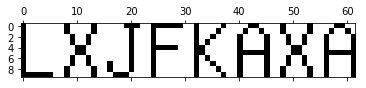

In [62]:
# Trial and error around min distsance
_ = plt.spy(align_stars(stars, 10312))

# Part Two
Good thing you didn't have to wait, because that would have taken a long time - much longer than the 3 seconds in the example above.

Impressed by your sub-hour communication capabilities, the Elves are curious: exactly how many seconds would they have needed to wait for that message to appear?

Your puzzle answer was 10312.

# Day 11: Chronal Charge 
You watch the Elves and their sleigh fade into the distance as they head toward the North Pole.

Actually, you're the one fading. The falling sensation returns.

The low fuel warning light is illuminated on your wrist-mounted device. Tapping it once causes it to project a hologram of the situation: a 300x300 grid of fuel cells and their current power levels, some negative. You're not sure what negative power means in the context of time travel, but it can't be good.

Each fuel cell has a coordinate ranging from 1 to 300 in both the X (horizontal) and Y (vertical) direction. In X,Y notation, the top-left cell is 1,1, and the top-right cell is 300,1.

The interface lets you select any 3x3 square of fuel cells. To increase your chances of getting to your destination, you decide to choose the 3x3 square with the largest total power.

The power level in a given fuel cell can be found through the following process:

- Find the fuel cell's rack ID, which is its X coordinate plus 10.
- Begin with a power level of the rack ID times the Y coordinate.
- Increase the power level by the value of the grid serial number (your puzzle input).
- Set the power level to itself multiplied by the rack ID.
- Keep only the hundreds digit of the power level (so 12345 becomes 3; numbers with no hundreds digit become 0).
- Subtract 5 from the power level.

For example, to find the power level of the fuel cell at 3,5 in a grid with serial number 8:

- The rack ID is 3 + 10 = 13.
- The power level starts at 13 * 5 = 65.
- Adding the serial number produces 65 + 8 = 73.
- Multiplying by the rack ID produces 73 * 13 = 949.
- The hundreds digit of 949 is 9.
- Subtracting 5 produces 9 - 5 = 4.

So, the power level of this fuel cell is 4.

Here are some more example power levels:

- Fuel cell at  122,79, grid serial number 57: power level -5.
- Fuel cell at 217,196, grid serial number 39: power level  0.
- Fuel cell at 101,153, grid serial number 71: power level  4.

Your goal is to find the 3x3 square which has the largest total power. The square must be entirely within the 300x300 grid. Identify this square using the X,Y coordinate of its top-left fuel cell. For example:

For grid serial number 18, the largest total 3x3 square has a top-left corner of 33,45 (with a total power of 29); these fuel cells appear in the middle of this 5x5 region:

    -2  -4   4   4   4
    -4   4   4   4  -5
     4   3   3   4  -4
     1   1   2   4  -3
    -1   0   2  -5  -2
    
For grid serial number 42, the largest 3x3 square's top-left is 21,61 (with a total power of 30); they are in the middle of this region:

    -3   4   2   2   2
    -4   4   3   3   4
    -5   3   3   4  -4
     4   3   3   4  -3
     3   3   3  -5  -1
     
What is the X,Y coordinate of the top-left fuel cell of the 3x3 square with the largest total power?

Your puzzle input is 4151.

Your puzzle answer was 20,46.

In [63]:
def grid_power(serial):
    X, Y = np.meshgrid(np.arange(300, dtype=np.int)+1, np.arange(300, dtype=np.int)+1)
    P = (np.floor((((((X + 10) * Y) + serial) * (X + 10)) % 1000) / 100) - 5).astype(np.int)
    return P

In [64]:
def find_max_grid_power(power, size=3):
    p_max = 0
    x_m = 0
    y_m = 0
    y_max, x_max = power.shape
    for x in range(x_max - size) :
        for y in range(y_max - size) :
            p = np.sum(power[y:y+size, x:x+size])
            if p > p_max:
                p_max = p
                x_m = x
                y_m = y
    return p_max, x_m+1, y_m+1, size

In [65]:
find_max_grid_power(grid_power(4151))

(30, 20, 46, 3)

# Part Two
You discover a dial on the side of the device; it seems to let you select a square of any size, not just 3x3. Sizes from 1x1 to 300x300 are supported.

Realizing this, you now must find the square of any size with the largest total power. Identify this square by including its size as a third parameter after the top-left coordinate: a 9x9 square with a top-left corner of 3,5 is identified as 3,5,9.

For example:

- For grid serial number 18, the largest total square (with a total power of 113) is 16x16 and has a top-left corner of 90,269, so its identifier is 90,269,16.
- For grid serial number 42, the largest total square (with a total power of 119) is 12x12 and has a top-left corner of 232,251, so its identifier is 232,251,12.

What is the X,Y,size identifier of the square with the largest total power?

Your puzzle input is still 4151.

Your puzzle answer was 231,65,14.

In [66]:
find_max_grid_power(grid_power(42), 12)

(119, 232, 251, 12)

In [67]:
def find_max_grid_power_and_size(serial):
    power = grid_power(serial)
    p_max = 0
    x_m = 0
    y_m = 0
    s_m = 0
    for size in range(1, 301):
        p, x, y, s = find_max_grid_power(power, size)
        if p > p_max:
            p_max = p
            x_m = x
            y_m = y
            s_m = s
    return p_max, x_m, y_m, s_m

In [68]:
find_max_grid_power_and_size(4151)

(158, 231, 65, 14)

# Day 12: Subterranean Sustainability 
The year 518 is significantly more underground than your history books implied. Either that, or you've arrived in a vast cavern network under the North Pole.

After exploring a little, you discover a long tunnel that contains a row of small pots as far as you can see to your left and right. A few of them contain plants - someone is trying to grow things in these geothermally-heated caves.

The pots are numbered, with 0 in front of you. To the left, the pots are numbered -1, -2, -3, and so on; to the right, 1, 2, 3.... Your puzzle input contains a list of pots from 0 to the right and whether they do (#) or do not (.) currently contain a plant, the initial state. (No other pots currently contain plants.) For example, an initial state of `#..##....` indicates that pots 0, 3, and 4 currently contain plants.

Your puzzle input also contains some notes you find on a nearby table: someone has been trying to figure out how these plants spread to nearby pots. Based on the notes, for each generation of plants, a given pot has or does not have a plant based on whether that pot (and the two pots on either side of it) had a plant in the last generation. These are written as `LLCRR =>` N, where L are pots to the left, C is the current pot being considered, R are the pots to the right, and N is whether the current pot will have a plant in the next generation. For example:

A note like `..#.. => .` means that a pot that contains a plant but with no plants within two pots of it will not have a plant in it during the next generation.
A note like `##.## => .` means that an empty pot with two plants on each side of it will remain empty in the next generation.
A note like `.##.# => #` means that a pot has a plant in a given generation if, in the previous generation, there were plants in that pot, the one immediately to the left, and the one two pots to the right, but not in the ones immediately to the right and two to the left.
It's not clear what these plants are for, but you're sure it's important, so you'd like to make sure the current configuration of plants is sustainable by determining what will happen after 20 generations.

For example, given the following input:

    initial state: #..#.#..##......###...###

    ...## => #
    ..#.. => #
    .#... => #
    .#.#. => #
    .#.## => #
    .##.. => #
    .#### => #
    #.#.# => #
    #.### => #
    ##.#. => #
    ##.## => #
    ###.. => #
    ###.# => #
    ####. => #

For brevity, in this example, only the combinations which do produce a plant are listed. (Your input includes all possible combinations.) Then, the next 20 generations will look like this:

                     1         2         3     
           0         0         0         0     
     0: ...#..#.#..##......###...###...........
     1: ...#...#....#.....#..#..#..#...........
     2: ...##..##...##....#..#..#..##..........
     3: ..#.#...#..#.#....#..#..#...#..........
     4: ...#.#..#...#.#...#..#..##..##.........
     5: ....#...##...#.#..#..#...#...#.........
     6: ....##.#.#....#...#..##..##..##........
     7: ...#..###.#...##..#...#...#...#........
     8: ...#....##.#.#.#..##..##..##..##.......
     9: ...##..#..#####....#...#...#...#.......
    10: ..#.#..#...#.##....##..##..##..##......
    11: ...#...##...#.#...#.#...#...#...#......
    12: ...##.#.#....#.#...#.#..##..##..##.....
    13: ..#..###.#....#.#...#....#...#...#.....
    14: ..#....##.#....#.#..##...##..##..##....
    15: ..##..#..#.#....#....#..#.#...#...#....
    16: .#.#..#...#.#...##...#...#.#..##..##...
    17: ..#...##...#.#.#.#...##...#....#...#...
    18: ..##.#.#....#####.#.#.#...##...##..##..
    19: .#..###.#..#.#.#######.#.#.#..#.#...#..
    20: .#....##....#####...#######....#.#..##.

The generation is shown along the left, where 0 is the initial state. The pot numbers are shown along the top, where 0 labels the center pot, negative-numbered pots extend to the left, and positive pots extend toward the right. Remember, the initial state begins at pot 0, which is not the leftmost pot used in this example.

After one generation, only seven plants remain. The one in pot 0 matched the rule looking for `..#..`, the one in pot 4 matched the rule looking for `.#.#.`, pot 9 matched `.##..`, and so on.

In this example, after 20 generations, the pots shown as # contain plants, the furthest left of which is pot -2, and the furthest right of which is pot 34. Adding up all the numbers of plant-containing pots after the 20th generation produces 325.

After 20 generations, what is the sum of the numbers of all pots which contain a plant?

Your puzzle answer was 1430.

In [69]:
pots_input = read_input('day_12.txt')

In [70]:
def parse_pots_rule(pots_input):
    lines = pots_input.split('\n')
    initial_state = lines[0].lstrip('initial state: ')
    update_rules = defaultdict(lambda: '.')
    for rule in lines[2:]:
        r, t = rule.split(' => ')
        update_rules[r] = t
    return initial_state, update_rules

In [71]:
test_pots_input = """initial state: #..#.#..##......###...###

...## => #
..#.. => #
.#... => #
.#.#. => #
.#.## => #
.##.. => #
.#### => #
#.#.# => #
#.### => #
##.#. => #
##.## => #
###.. => #
###.# => #
####. => #"""

In [72]:
pots_initial_test, pots_rule_test = parse_pots_rule(test_pots_input)

In [73]:
def update_pots(state, rule):
    new_state = list('.' * len(state))
    for pos in range(2, len(state)-2):
        
        new_state[pos] = rule[state[pos-2:pos+3]]
    return ''.join(new_state)

In [74]:
def iterate_pots_update(initial_state, rule, n_gen, display=False, display_count=False):
    # Pad initial state 
    state = ('.' * n_gen) + initial_state + ('.' * n_gen)
    pot_numbers = (
        range(-n_gen, 0) + range(len(initial_state) + 1) 
        + range(len(initial_state)+1, len(initial_state)+1+n_gen)
    )
    # print(pot_numbers)
    for i in range(n_gen):
        pot_sum = sum(map(lambda (p, s): p if s == '#' else 0, zip(pot_numbers, state)))
        pot_count = sum(map(lambda s: 1 if s == '#' else 0, state))
        
        if display:
            print(state)
        if display_count and (n_gen - i) < 10:
            # Display last 10 generations
            print(i, pot_count, pot_sum)
        state = update_pots(state, rule)
    
    pot_sum = sum(map(lambda (p, s): p if s == '#' else 0, zip(pot_numbers, state)))
    
    return pot_sum

In [75]:
iterate_pots_update(pots_initial_test, pots_rule_test, 20, display=True)

....................#..#.#..##......###...###....................
....................#...#....#.....#..#..#..#....................
....................##..##...##....#..#..#..##...................
...................#.#...#..#.#....#..#..#...#...................
....................#.#..#...#.#...#..#..##..##..................
.....................#...##...#.#..#..#...#...#..................
.....................##.#.#....#...#..##..##..##.................
....................#..###.#...##..#...#...#...#.................
....................#....##.#.#.#..##..##..##..##................
....................##..#..#####....#...#...#...#................
...................#.#..#...#.##....##..##..##..##...............
....................#...##...#.#...#.#...#...#...#...............
....................##.#.#....#.#...#.#..##..##..##..............
...................#..###.#....#.#...#....#...#...#..............
...................#....##.#....#.#..##...##..##..##.............
..........

325

In [76]:
pots_initial, pots_rule = parse_pots_rule(pots_input)

In [77]:
iterate_pots_update(pots_initial, pots_rule, 20)

1430

# Part Two
You realize that 20 generations aren't enough. After all, these plants will need to last another 1500 years to even reach your timeline, not to mention your future.

After fifty billion (50000000000) generations, what is the sum of the numbers of all pots which contain a plant?

Your puzzle answer was 1150000000457.

In [78]:
# See if things settle down after a while
iterate_pots_update(pots_initial, pots_rule, 120, display_count=True)

(111, 23, 3010)
(112, 23, 3033)
(113, 23, 3056)
(114, 23, 3079)
(115, 23, 3102)
(116, 23, 3125)
(117, 23, 3148)
(118, 23, 3171)
(119, 23, 3194)


3217

Looks like by generation 120 the population stops changing and pot sum keeps increasing by 23 each generation.

In [79]:
# Final pot count after 50,000,000,000 generations
3217 + (23 * (50000000000 - 120))

1150000000457

# Day 13: Mine Cart Madness 
A crop of this size requires significant logistics to transport produce, soil, fertilizer, and so on. The Elves are very busy pushing things around in carts on some kind of rudimentary system of tracks they've come up with.

Seeing as how cart-and-track systems don't appear in recorded history for another 1000 years, the Elves seem to be making this up as they go along. They haven't even figured out how to avoid collisions yet.

You map out the tracks (your puzzle input) and see where you can help.

Tracks consist of straight paths (| and -), curves (/ and \\), and intersections (+). Curves connect exactly two perpendicular pieces of track; for example, this is a closed loop:

    /----\
    |    |
    |    |
    \----/

Intersections occur when two perpendicular paths cross. At an intersection, a cart is capable of turning left, turning right, or continuing straight. Here are two loops connected by two intersections:

    /-----\
    |     |
    |  /--+--\
    |  |  |  |
    \--+--/  |
       |     |
       \-----/
   
Several carts are also on the tracks. Carts always face either up (^), down (v), left (<), or right (>). (On your initial map, the track under each cart is a straight path matching the direction the cart is facing.)

Each time a cart has the option to turn (by arriving at any intersection), it turns left the first time, goes straight the second time, turns right the third time, and then repeats those directions starting again with left the fourth time, straight the fifth time, and so on. This process is independent of the particular intersection at which the cart has arrived - that is, the cart has no per-intersection memory.

Carts all move at the same speed; they take turns moving a single step at a time. They do this based on their current location: carts on the top row move first (acting from left to right), then carts on the second row move (again from left to right), then carts on the third row, and so on. Once each cart has moved one step, the process repeats; each of these loops is called a tick.

For example, suppose there are two carts on a straight track:

    |  |  |  |  |
    v  |  |  |  |
    |  v  v  |  |
    |  |  |  v  X
    |  |  ^  ^  |
    ^  ^  |  |  |
    |  |  |  |  |

First, the top cart moves. It is facing down (v), so it moves down one square. Second, the bottom cart moves. It is facing up (^), so it moves up one square. Because all carts have moved, the first tick ends. Then, the process repeats, starting with the first cart. The first cart moves down, then the second cart moves up - right into the first cart, colliding with it! (The location of the crash is marked with an X.) This ends the second and last tick.

Here is a longer example:

    /->-\        
    |   |  /----\
    | /-+--+-\  |
    | | |  | v  |
    \-+-/  \-+--/
      \------/   

    /-->\        
    |   |  /----\
    | /-+--+-\  |
    | | |  | |  |
    \-+-/  \->--/
      \------/   

    /---v        
    |   |  /----\
    | /-+--+-\  |
    | | |  | |  |
    \-+-/  \-+>-/
      \------/   

    /---\        
    |   v  /----\
    | /-+--+-\  |
    | | |  | |  |
    \-+-/  \-+->/
      \------/   

    /---\        
    |   |  /----\
    | /->--+-\  |
    | | |  | |  |
    \-+-/  \-+--^
      \------/   

    /---\        
    |   |  /----\
    | /-+>-+-\  |
    | | |  | |  ^
    \-+-/  \-+--/
      \------/   

    /---\        
    |   |  /----\
    | /-+->+-\  ^
    | | |  | |  |
    \-+-/  \-+--/
      \------/   

    /---\        
    |   |  /----<
    | /-+-->-\  |
    | | |  | |  |
    \-+-/  \-+--/
      \------/   

    /---\        
    |   |  /---<\
    | /-+--+>\  |
    | | |  | |  |
    \-+-/  \-+--/
      \------/   

    /---\        
    |   |  /--<-\
    | /-+--+-v  |
    | | |  | |  |
    \-+-/  \-+--/
      \------/   

    /---\        
    |   |  /-<--\
    | /-+--+-\  |
    | | |  | v  |
    \-+-/  \-+--/
      \------/   

    /---\        
    |   |  /<---\
    | /-+--+-\  |
    | | |  | |  |
    \-+-/  \-<--/
      \------/   

    /---\        
    |   |  v----\
    | /-+--+-\  |
    | | |  | |  |
    \-+-/  \<+--/
      \------/   

    /---\        
    |   |  /----\
    | /-+--v-\  |
    | | |  | |  |
    \-+-/  ^-+--/
      \------/   

    /---\        
    |   |  /----\
    | /-+--+-\  |
    | | |  X |  |
    \-+-/  \-+--/
      \------/   
  
After following their respective paths for a while, the carts eventually crash. To help prevent crashes, you'd like to know the location of the first crash. Locations are given in X,Y coordinates, where the furthest left column is X=0 and the furthest top row is Y=0:

               111
     0123456789012
    0/---\        
    1|   |  /----\
    2| /-+--+-\  |
    3| | |  X |  |
    4\-+-/  \-+--/
    5  \------/   
    
In this example, the location of the first crash is 7,3.

In [81]:
tracks_input = read_input('day_13.txt')

In [82]:
tracks_test_input = r"""/->-\        
|   |  /----\
| /-+--+-\  |
| | |  | v  |
\-+-/  \-+--/
  \------/   """

In [83]:
def parse_tracks(tracks):
    mine = np.array(map(list, tracks.split('\n')))
    return mine

In [84]:
print(parse_tracks(tracks_test_input))

[['/' '-' '>' '-' '\\' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['|' ' ' ' ' ' ' '|' ' ' ' ' '/' '-' '-' '-' '-' '\\']
 ['|' ' ' '/' '-' '+' '-' '-' '+' '-' '\\' ' ' ' ' '|']
 ['|' ' ' '|' ' ' '|' ' ' ' ' '|' ' ' 'v' ' ' ' ' '|']
 ['\\' '-' '+' '-' '/' ' ' ' ' '\\' '-' '+' '-' '-' '/']
 [' ' ' ' '\\' '-' '-' '-' '-' '-' '-' '/' ' ' ' ' ' ']]


In [85]:
def update_tracks(mine):
    new_mine = mine.copy()
    rows, cols = mine.shape
    cart_syms = '<>^v'
    for i in range(rows):
        for j in range(cols):
            c = mine[i, j]
            if c in cart_syms:
                # Move cart
                if c == '>':
                    new_mine[i, j] = '-'
                    c_next = new_mine[i, j+1]
                    new_mine[i, j+1] = (
                        'X' if c_next in cart_syms else (
                            ''
                        )
                    )

# Day 14: Chocolate Charts 
You finally have a chance to look at all of the produce moving around. Chocolate, cinnamon, mint, chili peppers, nutmeg, vanilla... the Elves must be growing these plants to make hot chocolate! As you realize this, you hear a conversation in the distance. When you go to investigate, you discover two Elves in what appears to be a makeshift underground kitchen/laboratory.

The Elves are trying to come up with the ultimate hot chocolate recipe; they're even maintaining a scoreboard which tracks the quality score (0-9) of each recipe.

Only two recipes are on the board: the first recipe got a score of 3, the second, 7. Each of the two Elves has a current recipe: the first Elf starts with the first recipe, and the second Elf starts with the second recipe.

To create new recipes, the two Elves combine their current recipes. This creates new recipes from the digits of the sum of the current recipes' scores. With the current recipes' scores of 3 and 7, their sum is 10, and so two new recipes would be created: the first with score 1 and the second with score 0. If the current recipes' scores were 2 and 3, the sum, 5, would only create one recipe (with a score of 5) with its single digit.

The new recipes are added to the end of the scoreboard in the order they are created. So, after the first round, the scoreboard is `3, 7, 1, 0`.

After all new recipes are added to the scoreboard, each Elf picks a new current recipe. To do this, the Elf steps forward through the scoreboard a number of recipes equal to 1 plus the score of their current recipe. So, after the first round, the first Elf moves forward 1 + 3 = 4 times, while the second Elf moves forward 1 + 7 = 8 times. If they run out of recipes, they loop back around to the beginning. After the first round, both Elves happen to loop around until they land on the same recipe that they had in the beginning; in general, they will move to different recipes.

Drawing the first Elf as parentheses and the second Elf as square brackets, they continue this process:

    (3)[7]
    (3)[7] 1  0 
     3  7  1 [0](1) 0 
     3  7  1  0 [1] 0 (1)
    (3) 7  1  0  1  0 [1] 2 
     3  7  1  0 (1) 0  1  2 [4]
     3  7  1 [0] 1  0 (1) 2  4  5 
     3  7  1  0 [1] 0  1  2 (4) 5  1 
     3 (7) 1  0  1  0 [1] 2  4  5  1  5 
     3  7  1  0  1  0  1  2 [4](5) 1  5  8 
     3 (7) 1  0  1  0  1  2  4  5  1  5  8 [9]
     3  7  1  0  1  0  1 [2] 4 (5) 1  5  8  9  1  6 
     3  7  1  0  1  0  1  2  4  5 [1] 5  8  9  1 (6) 7 
     3  7  1  0 (1) 0  1  2  4  5  1  5 [8] 9  1  6  7  7 
     3  7 [1] 0  1  0 (1) 2  4  5  1  5  8  9  1  6  7  7  9 
     3  7  1  0 [1] 0  1  2 (4) *5  1  5  8  9  1  6  7  7  9*  2 

The Elves think their skill will improve after making a few recipes (your puzzle input). However, that could take ages; you can speed this up considerably by identifying the scores of the ten recipes after that. For example:

- If the Elves think their skill will improve after making 9 recipes, the scores of the ten recipes after the first nine on the scoreboard would be 5158916779 (highlighted in the last line of the diagram).
- After 5 recipes, the scores of the next ten would be 0124515891.
- After 18 recipes, the scores of the next ten would be 9251071085.
- After 2018 recipes, the scores of the next ten would be 5941429882.

What are the scores of the ten recipes immediately after the number of recipes in your puzzle input?

Your puzzle input is 260321.

Your puzzle answer was 9276422810.

In [86]:
def make_recipes(n_recipes=0, find_recipe=None, initial='37'):
    recipes = initial
    pos_1 = 0
    pos_2 = 1
    new_recipes = []
    if not find_recipe:
        loop_cond = (lambda r: len(r) < n_recipes + 10)
    else:
        loop_cond = (lambda r: not(find_recipe in r[-len(find_recipe)-1:]))
    
    while loop_cond(recipes):
        # print(pos_1, pos_2)
        new_recipe = (str(int(recipes[pos_1]) + int(recipes[pos_2])))
        recipes += new_recipe
        pos_1 = (pos_1 + (int(recipes[pos_1]) + 1)) % len(recipes)
        pos_2 = (pos_2 + (int(recipes[pos_2]) + 1)) % len(recipes)

    if find_recipe:
        return len(re.sub(find_recipe + '.*', '', recipes))
    else:
        return recipes[(n_recipes):(n_recipes+10)]

In [87]:
make_recipes(9)

'5158916779'

In [88]:
make_recipes(260321)

'9276422810'

# Part Two
As it turns out, you got the Elves' plan backwards. They actually want to know how many recipes appear on the scoreboard to the left of the first recipes whose scores are the digits from your puzzle input.

- 51589 first appears after 9 recipes.
- 01245 first appears after 5 recipes.
- 92510 first appears after 18 recipes.
- 59414 first appears after 2018 recipes.

How many recipes appear on the scoreboard to the left of the score sequence in your puzzle input?

Your puzzle input is still 260321.

Your puzzle answer was 20319117.

In [89]:
make_recipes(None, '59414')

2018

In [90]:
make_recipes(None, '260321')

20319117

# Day 15: Beverage Bandits
Having perfected their hot chocolate, the Elves have a new problem: the Goblins that live in these caves will do anything to steal it. Looks like they're here for a fight.

You scan the area, generating a map of the walls (#), open cavern (.), and starting position of every Goblin (G) and Elf (E) (your puzzle input).

Combat proceeds in rounds; in each round, each unit that is still alive takes a turn, resolving all of its actions before the next unit's turn begins. On each unit's turn, it tries to move into range of an enemy (if it isn't already) and then attack (if it is in range).

All units are very disciplined and always follow very strict combat rules. Units never move or attack diagonally, as doing so would be dishonorable. When multiple choices are equally valid, ties are broken in reading order: top-to-bottom, then left-to-right. For instance, the order in which units take their turns within a round is the reading order of their starting positions in that round, regardless of the type of unit or whether other units have moved after the round started. For example:

                     would take their
    These units:   turns in this order:
      #######           #######
      #.G.E.#           #.1.2.#
      #E.G.E#           #3.4.5#
      #.G.E.#           #.6.7.#
      #######           #######

Each unit begins its turn by identifying all possible targets (enemy units). If no targets remain, combat ends.

Then, the unit identifies all of the open squares (.) that are in range of each target; these are the squares which are adjacent (immediately up, down, left, or right) to any target and which aren't already occupied by a wall or another unit. Alternatively, the unit might already be in range of a target. If the unit is not already in range of a target, and there are no open squares which are in range of a target, the unit ends its turn.

If the unit is already in range of a target, it does not move, but continues its turn with an attack. Otherwise, since it is not in range of a target, it moves.

To move, the unit first considers the squares that are in range and determines which of those squares it could reach in the fewest steps. A step is a single movement to any adjacent (immediately up, down, left, or right) open (.) square. Units cannot move into walls or other units. The unit does this while considering the current positions of units and does not do any prediction about where units will be later. If the unit cannot reach (find an open path to) any of the squares that are in range, it ends its turn. If multiple squares are in range and tied for being reachable in the fewest steps, the square which is first in reading order is chosen. For example:

    Targets:      In range:     Reachable:    Nearest:      Chosen:
    #######       #######       #######       #######       #######
    #E..G.#       #E.?G?#       #E.@G.#       #E.!G.#       #E.+G.#
    #...#.#  -->  #.?.#?#  -->  #.@.#.#  -->  #.!.#.#  -->  #...#.#
    #.G.#G#       #?G?#G#       #@G@#G#       #!G.#G#       #.G.#G#
    #######       #######       #######       #######       #######

In the above scenario, the Elf has three targets (the three Goblins):

Each of the Goblins has open, adjacent squares which are in range (marked with a ? on the map).
Of those squares, four are reachable (marked @); the other two (on the right) would require moving through a wall or unit to reach.
Three of these reachable squares are nearest, requiring the fewest steps (only 2) to reach (marked !).
Of those, the square which is first in reading order is chosen (+).
The unit then takes a single step toward the chosen square along the shortest path to that square. If multiple steps would put the unit equally closer to its destination, the unit chooses the step which is first in reading order. (This requires knowing when there is more than one shortest path so that you can consider the first step of each such path.) For example:

    In range:     Nearest:      Chosen:       Distance:     Step:
    #######       #######       #######       #######       #######
    #.E...#       #.E...#       #.E...#       #4E212#       #..E..#
    #...?.#  -->  #...!.#  -->  #...+.#  -->  #32101#  -->  #.....#
    #..?G?#       #..!G.#       #...G.#       #432G2#       #...G.#
    #######       #######       #######       #######       #######

The Elf sees three squares in range of a target (?), two of which are nearest (!), and so the first in reading order is chosen (+). Under "Distance", each open square is marked with its distance from the destination square; the two squares to which the Elf could move on this turn (down and to the right) are both equally good moves and would leave the Elf 2 steps from being in range of the Goblin. Because the step which is first in reading order is chosen, the Elf moves right one square.

Here's a larger example of movement:

    Initially:
    #########
    #G..G..G#
    #.......#
    #.......#
    #G..E..G#
    #.......#
    #.......#
    #G..G..G#
    #########

    After 1 round:
    #########
    #.G...G.#
    #...G...#
    #...E..G#
    #.G.....#
    #.......#
    #G..G..G#
    #.......#
    #########

    After 2 rounds:
    #########
    #..G.G..#
    #...G...#
    #.G.E.G.#
    #.......#
    #G..G..G#
    #.......#
    #.......#
    #########

    After 3 rounds:
    #########
    #.......#
    #..GGG..#
    #..GEG..#
    #G..G...#
    #......G#
    #.......#
    #.......#
    #########

Once the Goblins and Elf reach the positions above, they all are either in range of a target or cannot find any square in range of a target, and so none of the units can move until a unit dies.

After moving (or if the unit began its turn in range of a target), the unit attacks.

To attack, the unit first determines all of the targets that are in range of it by being immediately adjacent to it. If there are no such targets, the unit ends its turn. Otherwise, the adjacent target with the fewest hit points is selected; in a tie, the adjacent target with the fewest hit points which is first in reading order is selected.

The unit deals damage equal to its attack power to the selected target, reducing its hit points by that amount. If this reduces its hit points to 0 or fewer, the selected target dies: its square becomes . and it takes no further turns.

Each unit, either Goblin or Elf, has 3 attack power and starts with 200 hit points.

For example, suppose the only Elf is about to attack:

           HP:            HP:
    G....  9       G....  9  
    ..G..  4       ..G..  4  
    ..EG.  2  -->  ..E..     
    ..G..  2       ..G..  2  
    ...G.  1       ...G.  1  

The "HP" column shows the hit points of the Goblin to the left in the corresponding row. The Elf is in range of three targets: the Goblin above it (with 4 hit points), the Goblin to its right (with 2 hit points), and the Goblin below it (also with 2 hit points). Because three targets are in range, the ones with the lowest hit points are selected: the two Goblins with 2 hit points each (one to the right of the Elf and one below the Elf). Of those, the Goblin first in reading order (the one to the right of the Elf) is selected. The selected Goblin's hit points (2) are reduced by the Elf's attack power (3), reducing its hit points to -1, killing it.

After attacking, the unit's turn ends. Regardless of how the unit's turn ends, the next unit in the round takes its turn. If all units have taken turns in this round, the round ends, and a new round begins.

The Elves look quite outnumbered. You need to determine the outcome of the battle: the number of full rounds that were completed (not counting the round in which combat ends) multiplied by the sum of the hit points of all remaining units at the moment combat ends. (Combat only ends when a unit finds no targets during its turn.)

Below is an entire sample combat. Next to each map, each row's units' hit points are listed from left to right.

    Initially:
    #######   
    #.G...#   G(200)
    #...EG#   E(200), G(200)
    #.#.#G#   G(200)
    #..G#E#   G(200), E(200)
    #.....#   
    #######   

    After 1 round:
    #######   
    #..G..#   G(200)
    #...EG#   E(197), G(197)
    #.#G#G#   G(200), G(197)
    #...#E#   E(197)
    #.....#   
    #######   

    After 2 rounds:
    #######   
    #...G.#   G(200)
    #..GEG#   G(200), E(188), G(194)
    #.#.#G#   G(194)
    #...#E#   E(194)
    #.....#   
    #######   

    Combat ensues; eventually, the top Elf dies:

    After 23 rounds:
    #######   
    #...G.#   G(200)
    #..G.G#   G(200), G(131)
    #.#.#G#   G(131)
    #...#E#   E(131)
    #.....#   
    #######   

    After 24 rounds:
    #######   
    #..G..#   G(200)
    #...G.#   G(131)
    #.#G#G#   G(200), G(128)
    #...#E#   E(128)
    #.....#   
    #######   

    After 25 rounds:
    #######   
    #.G...#   G(200)
    #..G..#   G(131)
    #.#.#G#   G(125)
    #..G#E#   G(200), E(125)
    #.....#   
    #######   

    After 26 rounds:
    #######   
    #G....#   G(200)
    #.G...#   G(131)
    #.#.#G#   G(122)
    #...#E#   E(122)
    #..G..#   G(200)
    #######   

    After 27 rounds:
    #######   
    #G....#   G(200)
    #.G...#   G(131)
    #.#.#G#   G(119)
    #...#E#   E(119)
    #...G.#   G(200)
    #######   

    After 28 rounds:
    #######   
    #G....#   G(200)
    #.G...#   G(131)
    #.#.#G#   G(116)
    #...#E#   E(113)
    #....G#   G(200)
    #######   

    More combat ensues; eventually, the bottom Elf dies:

    After 47 rounds:
    #######   
    #G....#   G(200)
    #.G...#   G(131)
    #.#.#G#   G(59)
    #...#.#   
    #....G#   G(200)
    #######   

Before the 48th round can finish, the top-left Goblin finds that there are no targets remaining, and so combat ends. So, the number of full rounds that were completed is 47, and the sum of the hit points of all remaining units is 200+131+59+200 = 590. From these, the outcome of the battle is 47 * 590 = 27730.

Here are a few example summarized combats:

    #######       #######
    #G..#E#       #...#E#   E(200)
    #E#E.E#       #E#...#   E(197)
    #G.##.#  -->  #.E##.#   E(185)
    #...#E#       #E..#E#   E(200), E(200)
    #...E.#       #.....#
    #######       #######

    Combat ends after 37 full rounds
    Elves win with 982 total hit points left
    Outcome: 37 * 982 = 36334
    #######       #######   
    #E..EG#       #.E.E.#   E(164), E(197)
    #.#G.E#       #.#E..#   E(200)
    #E.##E#  -->  #E.##.#   E(98)
    #G..#.#       #.E.#.#   E(200)
    #..E#.#       #...#.#   
    #######       #######   

    Combat ends after 46 full rounds
    Elves win with 859 total hit points left
    Outcome: 46 * 859 = 39514
    #######       #######   
    #E.G#.#       #G.G#.#   G(200), G(98)
    #.#G..#       #.#G..#   G(200)
    #G.#.G#  -->  #..#..#   
    #G..#.#       #...#G#   G(95)
    #...E.#       #...G.#   G(200)
    #######       #######   

    Combat ends after 35 full rounds
    Goblins win with 793 total hit points left
    Outcome: 35 * 793 = 27755
    #######       #######   
    #.E...#       #.....#   
    #.#..G#       #.#G..#   G(200)
    #.###.#  -->  #.###.#   
    #E#G#G#       #.#.#.#   
    #...#G#       #G.G#G#   G(98), G(38), G(200)
    #######       #######   

    Combat ends after 54 full rounds
    Goblins win with 536 total hit points left
    Outcome: 54 * 536 = 28944
    #########       #########   
    #G......#       #.G.....#   G(137)
    #.E.#...#       #G.G#...#   G(200), G(200)
    #..##..G#       #.G##...#   G(200)
    #...##..#  -->  #...##..#   
    #...#...#       #.G.#...#   G(200)
    #.G...G.#       #.......#   
    #.....G.#       #.......#   
    #########       #########   

Combat ends after 20 full rounds
Goblins win with 937 total hit points left
Outcome: 20 * 937 = 18740
What is the outcome of the combat described in your puzzle input?

# Day 16: Chronal Classification 
As you see the Elves defend their hot chocolate successfully, you go back to falling through time. This is going to become a problem.

If you're ever going to return to your own time, you need to understand how this device on your wrist works. You have a little while before you reach your next destination, and with a bit of trial and error, you manage to pull up a programming manual on the device's tiny screen.

According to the manual, the device has four registers (numbered 0 through 3) that can be manipulated by instructions containing one of 16 opcodes. The registers start with the value 0.

Every instruction consists of four values: an opcode, two inputs (named A and B), and an output (named C), in that order. The opcode specifies the behavior of the instruction and how the inputs are interpreted. The output, C, is always treated as a register.

In the opcode descriptions below, if something says "value A", it means to take the number given as A literally. (This is also called an "immediate" value.) If something says "register A", it means to use the number given as A to read from (or write to) the register with that number. So, if the opcode addi adds register A and value B, storing the result in register C, and the instruction addi 0 7 3 is encountered, it would add 7 to the value contained by register 0 and store the sum in register 3, never modifying registers 0, 1, or 2 in the process.

Many opcodes are similar except for how they interpret their arguments. The opcodes fall into seven general categories:

Addition:

- addr (add register) stores into register C the result of adding register A and register B.
- addi (add immediate) stores into register C the result of adding register A and value B.

Multiplication:

- mulr (multiply register) stores into register C the result of multiplying register A and register B.
- muli (multiply immediate) stores into register C the result of multiplying register A and value B.

Bitwise AND:

- banr (bitwise AND register) stores into register C the result of the bitwise AND of register A and register B.
- bani (bitwise AND immediate) stores into register C the result of the bitwise AND of register A and value B.

Bitwise OR:

- borr (bitwise OR register) stores into register C the result of the bitwise OR of register A and register B.
- bori (bitwise OR immediate) stores into register C the result of the bitwise OR of register A and value B.

Assignment:

- setr (set register) copies the contents of register A into register C. (Input B is ignored.)
- seti (set immediate) stores value A into register C. (Input B is ignored.)

Greater-than testing:

- gtir (greater-than immediate/register) sets register C to 1 if value A is greater than register B. Otherwise, register C is set to 0.
- gtri (greater-than register/immediate) sets register C to 1 if register A is greater than value B. Otherwise, register C is set to 0.
- gtrr (greater-than register/register) sets register C to 1 if register A is greater than register B. Otherwise, register C is set to 0.

Equality testing:

- eqir (equal immediate/register) sets register C to 1 if value A is equal to register B. Otherwise, register C is set to 0.
- eqri (equal register/immediate) sets register C to 1 if register A is equal to value B. Otherwise, register C is set to 0.
- eqrr (equal register/register) sets register C to 1 if register A is equal to register B. Otherwise, register C is set to 0.

Unfortunately, while the manual gives the name of each opcode, it doesn't seem to indicate the number. However, you can monitor the CPU to see the contents of the registers before and after instructions are executed to try to work them out. Each opcode has a number from 0 through 15, but the manual doesn't say which is which. For example, suppose you capture the following sample:

    Before: [3, 2, 1, 1]
    9 2 1 2
    After:  [3, 2, 2, 1]

This sample shows the effect of the instruction 9 2 1 2 on the registers. Before the instruction is executed, register 0 has value 3, register 1 has value 2, and registers 2 and 3 have value 1. After the instruction is executed, register 2's value becomes 2.

The instruction itself, 9 2 1 2, means that opcode 9 was executed with A=2, B=1, and C=2. Opcode 9 could be any of the 16 opcodes listed above, but only three of them behave in a way that would cause the result shown in the sample:

- Opcode 9 could be mulr: register 2 (which has a value of 1) times register 1 (which has a value of 2) produces 2, which matches the value stored in the output register, register 2.
- Opcode 9 could be addi: register 2 (which has a value of 1) plus value 1 produces 2, which matches the value stored in the output register, register 2.
- Opcode 9 could be seti: value 2 matches the value stored in the output register, register 2; the number given for B is irrelevant.

None of the other opcodes produce the result captured in the sample. Because of this, the sample above behaves like three opcodes.

You collect many of these samples (the first section of your puzzle input). The manual also includes a small test program (the second section of your puzzle input) - you can ignore it for now.

Ignoring the opcode numbers, how many samples in your puzzle input behave like three or more opcodes?

# Day 17: Reservoir Research 
You arrive in the year 18. If it weren't for the coat you got in 1018, you would be very cold: the North Pole base hasn't even been constructed.

Rather, it hasn't been constructed yet. The Elves are making a little progress, but there's not a lot of liquid water in this climate, so they're getting very dehydrated. Maybe there's more underground?

You scan a two-dimensional vertical slice of the ground nearby and discover that it is mostly sand with veins of clay. The scan only provides data with a granularity of square meters, but it should be good enough to determine how much water is trapped there. In the scan, x represents the distance to the right, and y represents the distance down. There is also a spring of water near the surface at x=500, y=0. The scan identifies which square meters are clay (your puzzle input).

For example, suppose your scan shows the following veins of clay:

    x=495, y=2..7
    y=7, x=495..501
    x=501, y=3..7
    x=498, y=2..4
    x=506, y=1..2
    x=498, y=10..13
    x=504, y=10..13
    y=13, x=498..504
    
Rendering clay as #, sand as ., and the water spring as +, and with x increasing to the right and y increasing downward, this becomes:

       44444455555555
       99999900000000
       45678901234567
     0 ......+.......
     1 ............#.
     2 .#..#.......#.
     3 .#..#..#......
     4 .#..#..#......
     5 .#.....#......
     6 .#.....#......
     7 .#######......
     8 ..............
     9 ..............
    10 ....#.....#...
    11 ....#.....#...
    12 ....#.....#...
    13 ....#######...

The spring of water will produce water forever. Water can move through sand, but is blocked by clay. Water always moves down when possible, and spreads to the left and right otherwise, filling space that has clay on both sides and falling out otherwise.

For example, if five squares of water are created, they will flow downward until they reach the clay and settle there. Water that has come to rest is shown here as ~, while sand through which water has passed (but which is now dry again) is shown as |:

    ......+.......
    ......|.....#.
    .#..#.|.....#.
    .#..#.|#......
    .#..#.|#......
    .#....|#......
    .#~~~~~#......
    .#######......
    ..............
    ..............
    ....#.....#...
    ....#.....#...
    ....#.....#...
    ....#######...

Two squares of water can't occupy the same location. If another five squares of water are created, they will settle on the first five, filling the clay reservoir a little more:

    ......+.......
    ......|.....#.
    .#..#.|.....#.
    .#..#.|#......
    .#..#.|#......
    .#~~~~~#......
    .#~~~~~#......
    .#######......
    ..............
    ..............
    ....#.....#...
    ....#.....#...
    ....#.....#...
    ....#######...

Water pressure does not apply in this scenario. If another four squares of water are created, they will stay on the right side of the barrier, and no water will reach the left side:

    ......+.......
    ......|.....#.
    .#..#.|.....#.
    .#..#~~#......
    .#..#~~#......
    .#~~~~~#......
    .#~~~~~#......
    .#######......
    ..............
    ..............
    ....#.....#...
    ....#.....#...
    ....#.....#...
    ....#######...

At this point, the top reservoir overflows. While water can reach the tiles above the surface of the water, it cannot settle there, and so the next five squares of water settle like this:

    ......+.......
    ......|.....#.
    .#..#||||...#.
    .#..#~~#|.....
    .#..#~~#|.....
    .#~~~~~#|.....
    .#~~~~~#|.....
    .#######|.....
    ........|.....
    ........|.....
    ....#...|.#...
    ....#...|.#...
    ....#~~~~~#...
    ....#######...

Note especially the leftmost |: the new squares of water can reach this tile, but cannot stop there. Instead, eventually, they all fall to the right and settle in the reservoir below.

After 10 more squares of water, the bottom reservoir is also full:

    ......+.......
    ......|.....#.
    .#..#||||...#.
    .#..#~~#|.....
    .#..#~~#|.....
    .#~~~~~#|.....
    .#~~~~~#|.....
    .#######|.....
    ........|.....
    ........|.....
    ....#~~~~~#...
    ....#~~~~~#...
    ....#~~~~~#...
    ....#######...

Finally, while there is nowhere left for the water to settle, it can reach a few more tiles before overflowing beyond the bottom of the scanned data:

    ......+.......    (line not counted: above minimum y value)
    ......|.....#.
    .#..#||||...#.
    .#..#~~#|.....
    .#..#~~#|.....
    .#~~~~~#|.....
    .#~~~~~#|.....
    .#######|.....
    ........|.....
    ...|||||||||..
    ...|#~~~~~#|..
    ...|#~~~~~#|..
    ...|#~~~~~#|..
    ...|#######|..
    ...|.......|..    (line not counted: below maximum y value)
    ...|.......|..    (line not counted: below maximum y value)
    ...|.......|..    (line not counted: below maximum y value)

How many tiles can be reached by the water? To prevent counting forever, ignore tiles with a y coordinate smaller than the smallest y coordinate in your scan data or larger than the largest one. Any x coordinate is valid. In this example, the lowest y coordinate given is 1, and the highest is 13, causing the water spring (in row 0) and the water falling off the bottom of the render (in rows 14 through infinity) to be ignored.

So, in the example above, counting both water at rest (~) and other sand tiles the water can hypothetically reach (|), the total number of tiles the water can reach is 57.

How many tiles can the water reach within the range of y values in your scan?

# Day 18: Settlers of The North Pole 
On the outskirts of the North Pole base construction project, many Elves are collecting lumber.

The lumber collection area is 50 acres by 50 acres; each acre can be either open ground (.), trees (|), or a lumberyard (#). You take a scan of the area (your puzzle input).

Strange magic is at work here: each minute, the landscape looks entirely different. In exactly one minute, an open acre can fill with trees, a wooded acre can be converted to a lumberyard, or a lumberyard can be cleared to open ground (the lumber having been sent to other projects).

The change to each acre is based entirely on the contents of that acre as well as the number of open, wooded, or lumberyard acres adjacent to it at the start of each minute. Here, "adjacent" means any of the eight acres surrounding that acre. (Acres on the edges of the lumber collection area might have fewer than eight adjacent acres; the missing acres aren't counted.)

In particular:

- An open acre will become filled with trees if three or more adjacent acres contained trees. Otherwise, nothing happens.
- An acre filled with trees will become a lumberyard if three or more adjacent acres were lumberyards. Otherwise, nothing happens.
- An acre containing a lumberyard will remain a lumberyard if it was adjacent to at least one other lumberyard and at least one acre containing trees. Otherwise, it becomes open.

These changes happen across all acres simultaneously, each of them using the state of all acres at the beginning of the minute and changing to their new form by the end of that same minute. Changes that happen during the minute don't affect each other.

For example, suppose the lumber collection area is instead only 10 by 10 acres with this initial configuration:

    Initial state:
    .#.#...|#.
    .....#|##|
    .|..|...#.
    ..|#.....#
    #.#|||#|#|
    ...#.||...
    .|....|...
    ||...#|.#|
    |.||||..|.
    ...#.|..|.

    After 1 minute:
    .......##.
    ......|###
    .|..|...#.
    ..|#||...#
    ..##||.|#|
    ...#||||..
    ||...|||..
    |||||.||.|
    ||||||||||
    ....||..|.

    After 2 minutes:
    .......#..
    ......|#..
    .|.|||....
    ..##|||..#
    ..###|||#|
    ...#|||||.
    |||||||||.
    ||||||||||
    ||||||||||
    .|||||||||

    After 3 minutes:
    .......#..
    ....|||#..
    .|.||||...
    ..###|||.#
    ...##|||#|
    .||##|||||
    ||||||||||
    ||||||||||
    ||||||||||
    ||||||||||

    After 4 minutes:
    .....|.#..
    ...||||#..
    .|.#||||..
    ..###||||#
    ...###||#|
    |||##|||||
    ||||||||||
    ||||||||||
    ||||||||||
    ||||||||||

    After 5 minutes:
    ....|||#..
    ...||||#..
    .|.##||||.
    ..####|||#
    .|.###||#|
    |||###||||
    ||||||||||
    ||||||||||
    ||||||||||
    ||||||||||

    After 6 minutes:
    ...||||#..
    ...||||#..
    .|.###|||.
    ..#.##|||#
    |||#.##|#|
    |||###||||
    ||||#|||||
    ||||||||||
    ||||||||||
    ||||||||||

    After 7 minutes:
    ...||||#..
    ..||#|##..
    .|.####||.
    ||#..##||#
    ||##.##|#|
    |||####|||
    |||###||||
    ||||||||||
    ||||||||||
    ||||||||||

    After 8 minutes:
    ..||||##..
    ..|#####..
    |||#####|.
    ||#...##|#
    ||##..###|
    ||##.###||
    |||####|||
    ||||#|||||
    ||||||||||
    ||||||||||

    After 9 minutes:
    ..||###...
    .||#####..
    ||##...##.
    ||#....###
    |##....##|
    ||##..###|
    ||######||
    |||###||||
    ||||||||||
    ||||||||||

    After 10 minutes:
    .||##.....
    ||###.....
    ||##......
    |##.....##
    |##.....##
    |##....##|
    ||##.####|
    ||#####|||
    ||||#|||||
    ||||||||||

After 10 minutes, there are 37 wooded acres and 31 lumberyards. Multiplying the number of wooded acres by the number of lumberyards gives the total resource value after ten minutes: 37 * 31 = 1147.

What will the total resource value of the lumber collection area be after 10 minutes?

# Day 19: Go With The Flow 
With the Elves well on their way constructing the North Pole base, you turn your attention back to understanding the inner workings of programming the device.

You can't help but notice that the device's opcodes don't contain any flow control like jump instructions. The device's manual goes on to explain:

"In programs where flow control is required, the instruction pointer can be bound to a register so that it can be manipulated directly. This way, setr/seti can function as absolute jumps, addr/addi can function as relative jumps, and other opcodes can cause truly fascinating effects."

This mechanism is achieved through a declaration like #ip 1, which would modify register 1 so that accesses to it let the program indirectly access the instruction pointer itself. To compensate for this kind of binding, there are now six registers (numbered 0 through 5); the five not bound to the instruction pointer behave as normal. Otherwise, the same rules apply as the last time you worked with this device.

When the instruction pointer is bound to a register, its value is written to that register just before each instruction is executed, and the value of that register is written back to the instruction pointer immediately after each instruction finishes execution. Afterward, move to the next instruction by adding one to the instruction pointer, even if the value in the instruction pointer was just updated by an instruction. (Because of this, instructions must effectively set the instruction pointer to the instruction before the one they want executed next.)

The instruction pointer is 0 during the first instruction, 1 during the second, and so on. If the instruction pointer ever causes the device to attempt to load an instruction outside the instructions defined in the program, the program instead immediately halts. The instruction pointer starts at 0.

It turns out that this new information is already proving useful: the CPU in the device is not very powerful, and a background process is occupying most of its time. You dump the background process' declarations and instructions to a file (your puzzle input), making sure to use the names of the opcodes rather than the numbers.

For example, suppose you have the following program:

    #ip 0
    seti 5 0 1
    seti 6 0 2
    addi 0 1 0
    addr 1 2 3
    setr 1 0 0
    seti 8 0 4
    seti 9 0 5
    
When executed, the following instructions are executed. Each line contains the value of the instruction pointer at the time the instruction started, the values of the six registers before executing the instructions (in square brackets), the instruction itself, and the values of the six registers after executing the instruction (also in square brackets).

    ip=0 [0, 0, 0, 0, 0, 0] seti 5 0 1 [0, 5, 0, 0, 0, 0]
    ip=1 [1, 5, 0, 0, 0, 0] seti 6 0 2 [1, 5, 6, 0, 0, 0]
    ip=2 [2, 5, 6, 0, 0, 0] addi 0 1 0 [3, 5, 6, 0, 0, 0]
    ip=4 [4, 5, 6, 0, 0, 0] setr 1 0 0 [5, 5, 6, 0, 0, 0]
    ip=6 [6, 5, 6, 0, 0, 0] seti 9 0 5 [6, 5, 6, 0, 0, 9]

In detail, when running this program, the following events occur:

- The first line (#ip 0) indicates that the instruction pointer should be bound to register 0 in this program. This is not an instruction, and so the value of the instruction pointer does not change during the processing of this line.
- The instruction pointer contains 0, and so the first instruction is executed (seti 5 0 1). It updates register 0 to the current instruction pointer value (0), sets register 1 to 5, sets the instruction pointer to the value of register 0 (which has no effect, as the instruction did not modify register 0), and then adds one to the instruction pointer.
- The instruction pointer contains 1, and so the second instruction, seti 6 0 2, is executed. This is very similar to the instruction before it: 6 is stored in register 2, and the instruction pointer is left with the value 2.
- The instruction pointer is 2, which points at the instruction addi 0 1 0. This is like a relative jump: the value of the instruction pointer, 2, is loaded into register 0. Then, addi finds the result of adding the value in register 0 and the value 1, storing the result, 3, back in register 0. Register 0 is then copied back to the instruction pointer, which will cause it to end up 1 larger than it would have otherwise and skip the next instruction (addr 1 2 3) entirely. Finally, 1 is added to the instruction pointer.
- The instruction pointer is 4, so the instruction setr 1 0 0 is run. This is like an absolute jump: it copies the value contained in register 1, 5, into register 0, which causes it to end up in the instruction pointer. The instruction pointer is then incremented, leaving it at 6.
- The instruction pointer is 6, so the instruction seti 9 0 5 stores 9 into register 5. The instruction pointer is incremented, causing it to point outside the program, and so the program ends.

What value is left in register 0 when the background process halts?

# Day 20: A Regular Map 
While you were learning about instruction pointers, the Elves made considerable progress. When you look up, you discover that the North Pole base construction project has completely surrounded you.

The area you are in is made up entirely of rooms and doors. The rooms are arranged in a grid, and rooms only connect to adjacent rooms when a door is present between them.

For example, drawing rooms as ., walls as #, doors as | or -, your current position as X, and where north is up, the area you're in might look like this:

    #####
    #.|.#
    #-###
    #.|X#
    #####
You get the attention of a passing construction Elf and ask for a map. "I don't have time to draw out a map of this place - it's huge. Instead, I can give you directions to every room in the facility!" He writes down some directions on a piece of parchment and runs off. In the example above, the instructions might have been ^WNE$, a regular expression or "regex" (your puzzle input).

The regex matches routes (like WNE for "west, north, east") that will take you from your current room through various doors in the facility. In aggregate, the routes will take you through every door in the facility at least once; mapping out all of these routes will let you build a proper map and find your way around.

^ and $ are at the beginning and end of your regex; these just mean that the regex doesn't match anything outside the routes it describes. (Specifically, ^ matches the start of the route, and $ matches the end of it.) These characters will not appear elsewhere in the regex.

The rest of the regex matches various sequences of the characters N (north), S (south), E (east), and W (west). In the example above, ^WNE$ matches only one route, WNE, which means you can move west, then north, then east from your current position. Sequences of letters like this always match that exact route in the same order.

Sometimes, the route can branch. A branch is given by a list of options separated by pipes (|) and wrapped in parentheses. So, ^N(E|W)N$ contains a branch: after going north, you must choose to go either east or west before finishing your route by going north again. By tracing out the possible routes after branching, you can determine where the doors are and, therefore, where the rooms are in the facility.

For example, consider this regex: ^ENWWW(NEEE|SSE(EE|N))$

This regex begins with ENWWW, which means that from your current position, all routes must begin by moving east, north, and then west three times, in that order. After this, there is a branch. Before you consider the branch, this is what you know about the map so far, with doors you aren't sure about marked with a ?:

    #?#?#?#?#
    ?.|.|.|.?
    #?#?#?#-#
        ?X|.?
        #?#?#

After this point, there is (NEEE|SSE(EE|N)). This gives you exactly two options: NEEE and SSE(EE|N). By following NEEE, the map now looks like this:

    #?#?#?#?#
    ?.|.|.|.?
    #-#?#?#?#
    ?.|.|.|.?
    #?#?#?#-#
        ?X|.?
        #?#?#

Now, only SSE(EE|N) remains. Because it is in the same parenthesized group as NEEE, it starts from the same room NEEE started in. It states that starting from that point, there exist doors which will allow you to move south twice, then east; this ends up at another branch. After that, you can either move east twice or north once. This information fills in the rest of the doors:

    #?#?#?#?#
    ?.|.|.|.?
    #-#?#?#?#
    ?.|.|.|.?
    #-#?#?#-#
    ?.?.?X|.?
    #-#-#?#?#
    ?.|.|.|.?
    #?#?#?#?#

Once you've followed all possible routes, you know the remaining unknown parts are all walls, producing a finished map of the facility:

    #########
    #.|.|.|.#
    #-#######
    #.|.|.|.#
    #-#####-#
    #.#.#X|.#
    #-#-#####
    #.|.|.|.#
    #########

Sometimes, a list of options can have an empty option, like (NEWS|WNSE|). This means that routes at this point could effectively skip the options in parentheses and move on immediately. For example, consider this regex and the corresponding map:

    ^ENNWSWW(NEWS|)SSSEEN(WNSE|)EE(SWEN|)NNN$

    ###########
    #.|.#.|.#.#
    #-###-#-#-#
    #.|.|.#.#.#
    #-#####-#-#
    #.#.#X|.#.#
    #-#-#####-#
    #.#.|.|.|.#
    #-###-###-#
    #.|.|.#.|.#
    ###########
    
This regex has one main route which, at three locations, can optionally include additional detours and be valid: (NEWS|), (WNSE|), and (SWEN|). Regardless of which option is taken, the route continues from the position it is left at after taking those steps. So, for example, this regex matches all of the following routes (and more that aren't listed here):

- ENNWSWWSSSEENEENNN
- ENNWSWWNEWSSSSEENEENNN
- ENNWSWWNEWSSSSEENEESWENNNN
- ENNWSWWSSSEENWNSEEENNN
By following the various routes the regex matches, a full map of all of the doors and rooms in the facility can be assembled.

To get a sense for the size of this facility, you'd like to determine which room is furthest from you: specifically, you would like to find the room for which the shortest path to that room would require passing through the most doors.

- In the first example (^WNE$), this would be the north-east corner 3 doors away.
- In the second example (^ENWWW(NEEE|SSE(EE|N))$), this would be the south-east corner 10 doors away.
- In the third example (^ENNWSWW(NEWS|)SSSEEN(WNSE|)EE(SWEN|)NNN$), this would be the north-east corner 18 doors away.
Here are a few more examples:

Regex: ^ESSWWN(E|NNENN(EESS(WNSE|)SSS|WWWSSSSE(SW|NNNE)))$

    Furthest room requires passing 23 doors

    #############
    #.|.|.|.|.|.#
    #-#####-###-#
    #.#.|.#.#.#.#
    #-#-###-#-#-#
    #.#.#.|.#.|.#
    #-#-#-#####-#
    #.#.#.#X|.#.#
    #-#-#-###-#-#
    #.|.#.|.#.#.#
    ###-#-###-#-#
    #.|.#.|.|.#.#
    #############


Regex: ^WSSEESWWWNW(S|NENNEEEENN(ESSSSW(NWSW|SSEN)|WSWWN(E|WWS(E|SS))))$

    Furthest room requires passing 31 doors

    ###############
    #.|.|.|.#.|.|.#
    #-###-###-#-#-#
    #.|.#.|.|.#.#.#
    #-#########-#-#
    #.#.|.|.|.|.#.#
    #-#-#########-#
    #.#.#.|X#.|.#.#
    ###-#-###-#-#-#
    #.|.#.#.|.#.|.#
    #-###-#####-###
    #.|.#.|.|.#.#.#
    #-#-#####-#-#-#
    #.#.|.|.|.#.|.#
    ###############

What is the largest number of doors you would be required to pass through to reach a room? That is, find the room for which the shortest path from your starting location to that room would require passing through the most doors; what is the fewest doors you can pass through to reach it?

# Day 21: Chronal Conversion 
You should have been watching where you were going, because as you wander the new North Pole base, you trip and fall into a very deep hole!

Just kidding. You're falling through time again.

If you keep up your current pace, you should have resolved all of the temporal anomalies by the next time the device activates. Since you have very little interest in browsing history in 500-year increments for the rest of your life, you need to find a way to get back to your present time.

After a little research, you discover two important facts about the behavior of the device:

First, you discover that the device is hard-wired to always send you back in time in 500-year increments. Changing this is probably not feasible.

Second, you discover the activation system (your puzzle input) for the time travel module. Currently, it appears to run forever without halting.

If you can cause the activation system to halt at a specific moment, maybe you can make the device send you so far back in time that you cause an integer underflow in time itself and wrap around back to your current time!

The device executes the program as specified in manual section one and manual section two.

Your goal is to figure out how the program works and cause it to halt. You can only control register 0; every other register begins at 0 as usual.

Because time travel is a dangerous activity, the activation system begins with a few instructions which verify that bitwise AND (via bani) does a numeric operation and not an operation as if the inputs were interpreted as strings. If the test fails, it enters an infinite loop re-running the test instead of allowing the program to execute normally. If the test passes, the program continues, and assumes that all other bitwise operations (banr, bori, and borr) also interpret their inputs as numbers. (Clearly, the Elves who wrote this system were worried that someone might introduce a bug while trying to emulate this system with a scripting language.)

What is the lowest non-negative integer value for register 0 that causes the program to halt after executing the fewest instructions? (Executing the same instruction multiple times counts as multiple instructions executed.)